In [4]:
from IPython.display import HTML
HTML('''
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.
js"></script>
<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<center><img src="banner.png" width="100%" height="100%"></center>

**MSDS 2023 Term 4 SLT1B** | Loraine Menorca, BJ Enrik Yepes
***

In [3]:
# For visualization
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as tick
import matplotlib.pyplot as plt
import geopandas as gpd

# Essential libraries
import numpy as np
import pandas as pd
import pickle

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-e9fvn76g because the default path (/home/mmenorca/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">I. Executive Summary</h1>

Climate change has emerged as one of the most pressing challenges of our time. It refers to long-term shifts in temperature, precipitation, wind patterns, and other aspects of the Earth's climate system. The scientific consensus is clear: human activities, particularly the burning of fossil fuels and deforestation, are driving significant changes in our planet's climate. These changes have far-reaching consequences, including rising global temperatures, melting ice caps, sea-level rise, extreme weather events, and disruptions to ecosystems and biodiversity. [14, 15, 16, 17]

The impacts of climate change are already being felt around the world. From devastating wildfires and hurricanes to droughts and heatwaves, communities are experiencing the tangible effects of a changing climate. The consequences extend beyond environmental concerns to encompass social, economic, and political dimensions. Food security, water availability, public health, infrastructure resilience, and economic stability are all at stake. [14, 15, 16, 17]

In this study, we present the key findings from our analysis of climate data using the NOAA Global Historical Climatology Network Daily (GHCN-D) dataset. This dataset spans a 22-year period from 2000 to 2022 and provides a comprehensive and reliable source of climate observations worldwide. Our analysis focuses on temperature, precipitation, and climate trends at both global and regional levels. By examining this data, we aim to gain insights into the changing climate patterns and their potential impacts on various aspects of our environment and society.

The motivation behind our analysis lies in the urgency of addressing climate change and its associated challenges. Rising temperatures, shifting precipitation patterns, and extreme weather events pose significant risks to ecosystems, food production, water resources, and human well-being. It is crucial to understand the current state of the climate and identify key trends to inform effective strategies for climate adaptation and mitigation.

The years 2010 and 2021 show the highest climate variations, indicating potential changes in the Earth's climatic conditions. Furthermore, our analysis revealed that Iran, Sudan, Kazakhstan, Armenia, and Mauritania have been identified as the most vulnerable countries to climate change over the past two decades.

In conclusion, our analysis of the GHCN-D dataset underscores the critical need for immediate action to address climate change. Governments, citizens, scientists, and stakeholders must collaborate and take collective responsibility to implement effective climate policies, embrace sustainable practices, and support ongoing research. By doing so, we can mitigate the adverse impacts of climate change, protect vulnerable regions, and create a resilient and sustainable future for generations to come.

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">II. Problem Statement</h1>

This study aims to examine the potential presence of climate change to understand its impact and identify potential indicators. Specifically, we want to answer the question:

***Do precipitation and temperature patterns exhibit notable variations over time in certain regions,
potentially indicating the presence of climate change?***

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">III. Motivation</h1>

Climate change poses significant risks to ecosystems, human societies, and economies, underscoring the importance of this study. By delving into the intricacies of precipitation and temperature patterns, we seek to unveil their evolving nature over time. Through the identification of noteworthy variations and trends, we can gather compelling evidence of climate change's presence and grasp its potential implications for specific regions.

The outcomes of our study will foster a deeper comprehension of climate change and its ramifications for diverse geographical areas. By pinpointing distinctive shifts in precipitation and temperature patterns, we can proactively raise awareness about regions that necessitate focused efforts in climate adaptation and mitigation strategies. Furthermore, our analysis will provide invaluable insights for policymakers, scientists, and stakeholders engaged in crucial decision-making processes relating to climate change.

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">IV. Data Source</h1>

**NOAA Global Historical Climatology Network Daily (GHCN-D)**

The NOAA Global Historical Climatology Network Daily (GHCN-D) dataset is a comprehensive collection of daily climate observations from around the world. It provides valuable historical climate data, including temperature, precipitation, wind speed, and other meteorological variables. The dataset is widely used for climate research, monitoring climate trends, and understanding the impact of climate change.

The GHCN-D dataset encompasses observations from thousands of weather stations, spanning over a century of data. It contains measurements from both land-based stations and buoys, offering a global perspective on climate patterns. The dataset undergoes rigorous quality control procedures to ensure accuracy and reliability, making it a trusted resource for climate scientists and researchers worldwide.

**Download Details**

*The dataset can be accessed from the Registry of Open Data on AWS*

The Registry of Open Data on AWS is a repository of diverse datasets that are freely accessible on the Amazon Web Services (AWS) cloud platform. It serves as a centralized hub for discovering and accessing open datasets, promoting collaboration and innovation across different domains. The GHCN-D dataset can be found in the registry using the following link:

Link: https://registry.opendata.aws/noaa-ghcn/

**AWS S3 Bucket**

The GHCN-D dataset is stored in the AWS S3 bucket with the Amazon Resource Name (ARN) arn:aws:s3:::noaa-ghcn-pds. The dataset files have been converted from CSV format to parquet format, which optimizes storage and facilitates faster data loading and processing. The parquet files are stored in a separate S3 bucket.

**For the Original CSV Files**

 - **Amazon Resource Name (ARN)**

 - `arn:aws:s3:::noaa-ghcn-pds`

 - **AWS Region**

 - `us-east-1`

 - **AWS CLI Access (No AWS account required)**

 - `aws s3 ls --no-sign-request s3://noaa-ghcn-pds/`

**For the Parquet Files**

 - **Amazon Resource Name (ARN)**

 - `arn:aws:s3:::bdcc-lab2-2023`

 - **AWS Region**

 - `ap-southeast-2`

 - **AWS CLI Access (No AWS account required)**

 - `aws s3 ls --no-sign-request s3://bdcc-lab2-2023/`

**Dataset Summary:**

GHCN-Daily is a composite of climate records from numerous sources that were merged and subjected to a common suite of quality assurance reviews (Durre et al., 2010). The archive includes the following meteorological elements:

 - Daily maximum temperature
 - Daily minimum temperature
 - Temperature at the time of observation
 - Precipitation (i.e., rain, melted snow)
 - Snowfall
 - Snow depth
 - Other elements where available

In this archive, the period of record station files is parsed into yearly files that contain all available GHCN-Daily station data for that year plus a time of observation field (where available—primarily for U.S. Cooperative Observers). The observation times for U.S. Cooperative Observer data come from the station history archived in NCDC’s Historical Observing Metadata Repository (HOMR). The files are updated daily on AWS to be in sync with updates to the GHCN-Daily dataset at NOAA.

**Original Data Description (More Details)**

Link: https://github.com/awslabs/open-data-docs/tree/main/docs/noaa/noaa-ghcn

<h3><u>Summary of the Raw Data</u></h3>

**Summary of the Day Format**

- The yearly files are formatted so that every observation is represented by a single row with the following fields:

</br>

<span style="font-size: 14px">
    <center><b>Table 1. NOAA GHCN-D Raw Data Description</b></center>
</span>
    
|<center>Variable Name</center>|<center>Data type</center>|<center>Description</center>
|:-------------|:-------|:---|
|ID            |string  |11 character station identification code. Please see ghcnd-stations section below for an explantation
|YEAR/MONTH/DAY|string  |8 character date in YYYYMMDD format (e.g. 19860529 = May 29, 1986)
|ELEMENT       |string  |4 character indicator of element type
|DATA VALUE    |string  |5 character data value for ELEMENT
|M-FLAG        |string  |1 character Measurement Flag
|Q-FLAG        |struct  |1 character Quality Flag
|S-FLAG        |string  |1 character Source Flag
|OBS-TIME      |string  |4-character time of observation in hour-minute format (i.e. 0700 =7:00 am)

**ELEMENT Summary**

The five core elements are:

 - `PRCP` = Precipitation (tenths of mm)
 - `SNOW` = Snowfall (mm)
 - `SNWD` = Snow depth (mm)
 - `TMAX` = Maximum temperature (tenths of degrees C)
 - `TMIN` = Minimum temperature (tenths of degrees C)
 
Please see the Full Explanation of Elements section in the link for a full description: https://github.com/awslabs/open-data-docs/tree/main/docs/noaa/noaa-ghcn

**Q-FLAG**

Q-FLAG is the measurement quality flag. There are fourteen possible values:

 - `Blank` = did not fail any quality assurance check
 - `D` = failed duplicate check
 - `G` = failed gap check
 - `I` = failed internal consistency check
 - `K` = failed streak/frequent-value check
 - `L` = failed check on length of multiday period
 - `M` = failed mega consistency check
 - `N` = failed naught check
 - `O` = failed climatological outlier check
 - `R` = failed lagged range check
 - `S` = failed spatial consistency check
 - `T` = failed temporal consistency check
 - `W` = temperature too warm for snow
 - `X` = failed bounds check
 - `Z` = flagged as a result of an official Datzilla Investigation
 
**S-FLAG**

S-FLAG is the source flag for the observation. There are twenty nine possible values (including blank, upper and lower case letters):

- `Blank` = No source (i.e., data value missing)
- `0` = U.S. Cooperative Summary of the Day (NCDC DSI-3200)
- `6` = CDMP Cooperative Summary of the Day (NCDC DSI-3206)
- `7` = U.S. Cooperative Summary of the Day – Transmitted via WxCoder3 (NCDC SI-3207)
- `A` = U.S. Automated Surface Observing System (ASOS) real-time data (since January 1, 2006)
- `a` = Australian data from the Australian Bureau of Meteorology
- `B` = U.S. ASOS data for October 2000-December 2005 (NCDC DSI-3211)
- `b` = Belarus update
- `C` = Environment Canada
- `E` = European Climate Assessment and Dataset (Klein Tank et al., 2002)
- `F` = U.S. Fort data
- `G` = Official Global Climate Observing System (GCOS) or other government-supplied data
- `H` = High Plains Regional Climate Center real-time data
- `I` = International collection (non U.S. data received through personal contacts)
- `K` = U.S. Cooperative Summary of the Day data digitized from paper observer forms (from 2011 to present)
- `M` = Monthly METAR Extract (additional ASOS data)
- `N` = Community Collaborative Rain, Hail,and Snow (CoCoRaHS)
- `Q` = Data from several African countries that had been “quarantined”, that is, withheld from public release until permission was granted from the respective meteorological services
- `R` = NCEI Reference Network Database (Climate Reference Network and Regional Climate Reference Network)
- `r` = All-Russian Research Institute of Hydro-meteorological Information-World Data Center
- `S` = Global Summary of the Day (NCDC DSI-9618)NOTE: “S” values are derived from hourly synoptic reports exchanged on the Global Telecommunications System (GTS). Daily values derived in this fashion may differ significantly from “true” daily data, particularly for precipitation (i.e., use with caution).
- `s` = China Meteorological Administration/National Meteorological Information Center/Climatic Data Center (http://cdc.cma.gov.cn)
- `T` = SNOwpack TELemtry (SNOTEL) data obtained from the U.S. Department of Agriculture’s Natural Resources Conservation Service
- `U` = Remote Automatic Weather Station (RAWS) data obtained from the Western Regional Climate Center
- `u` = Ukraine update
- `W` = WBAN/ASOS Summary of the Day from NCDC’s Integrated Surface Data (ISD).
- `X` = U.S. First-Order Summary of the Day (NCDC DSI-3210)
- `Z` = Datzilla official additions or replacements
- `z` = Uzbekistan update

<h3><u>FORMAT OF “ghcnd-stations.txt” file</u></h3>

**Summary of the Day Format**

There are over 106200 stations listed in a separate file. Found here:

http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-stations.txt

The table below describes the structure of each row of ghcnd-stations.txt

</br>

<span style="font-size: 14px">
    <center><b>Table 2. ghcnd-stations Raw Data Description</b></center>
</span>
    
|<center>Variable Name</center>|<center>Column</center>|<center>Type</center>|
|:-------------|:-------|:-----|
|ID            |1-11    |Character
|LATITUDE      |13-20   |Real
|LONGITUDE     |22-30   |Real
|ELEVATION     |32-37   |Real
|STATE         |39-40   |Character
|NAME          |42-71   |Character
|GSN FLAG      |73-75   |Character
|HCN/CRN FLAG  |77-79   |Character
|WMO ID        |81-85   |Character

These variables have the following definitions:

 - ID = the station identification code.

    - The first two characters denote the FIPS country code
    - The third character is a network code that identifies the station numbering system used
    - 0 = unspecified (station identified by up to eight alphanumeric characters)
    - 1 = Community Collaborative Rain, Hail, and Snow (CoCoRaHS) based identification number. To ensure consistency with GHCN Daily, all numbers in the original CoCoRaHS IDs have been left-filled to make them all four digits long. In addition, the characters “-” and “_” have been removed to ensure that the IDs do not exceed 11 characters when preceded by “US1”. For example, the CoCoRaHS ID “AZ-MR-156” becomes “US1AZMR0156” in GHCN-Daily
    - C = U.S. Cooperative Network identification number (last six characters of the GHCN-Daily ID)
    - E = Identification number used in the ECA&D non-blended dataset
    - M = World Meteorological Organization ID (last five characters of the GHCN-Daily ID)
    - N = Identification number used in data supplied by a National Meteorological or Hydrological Center
    - R = U.S. Interagency Remote Automatic Weather Station (RAWS) identifier
    - S = U.S. Natural Resources Conservation Service SNOwpack TELemtry (SNOTEL) station identifier
    - W = WBAN identification number (last five characters of the GHCN-Daily ID)
    - The remaining eight characters contain the actual station ID.


 - LATITUDE = latitude of the station (in decimal degrees).

 - LONGITUDE = longitude of the station (in decimal degrees).

 - STATE = U.S. postal code for the state (for U.S. and Canadian stations only).

 - NAME = name of the station.

 - GSN FLAG = flag that indicates whether the station is part of the GCOS Surface Network (GSN). The flag is assigned by cross-referencing the number in the WMOID field with the official list of GSN stations. There are two possible values:

 - Blank = non-GSN station or WMO Station number not available
 - GSN = GSN station
- HCN/CRN FLAG = flag that indicates whether the station is part of the U.S. Historical Climatology Network (HCN). There are three possible values:

 - Blank = Not a member of the U.S. Historical Climatology or U.S. Climate Reference Networks
 - HCN = U.S. Historical Climatology Network station
 - CRN = U.S. Climate Reference Network or U.S. Regional Climate Network Station
 - WMO ID is the World Meteorological Organization (WMO) number for the station. If the station has no WMO number (or one has not yet been matched to this station), then the field is blank.

<h3><u>GHCN-D Final Data</u></h3>

</br>

<span style="font-size: 14px">
    <center><b>Table 3. GHCN-D Final Data Description</b></center>
</span>
    
|<center>Variable Name</center>|<center>Data Type</center>|<center>Type</center>|
|:-------------|:--------|:-----|
|COUNTRY_CODE  |string   |FIPS country code
|ID            |string   |11-character station identification code.
|M-FLAG        |string   |1-character Measurement Flag
|Q-FLAG        |struct   |1-character Quality Flag
|S-FLAG        |string   |1-character Source Flag
|OBS_TIME      |string   |4-character time of observation in hour-minute format (i.e. 0700 =7:00 am)
|filename      |string   |Source Filename of the data
|ACMH... HWESD |string   |Element values


<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">V. Assumptions & Design Constraints</h1>

This study is built upon certain assumptions and design constraints to ensure the integrity and reliability of the analysis. It is important to outline these factors to provide transparency and context to the research process. The following assumptions and design constraints are considered in this study:

1. **Data Quality and Availability:** The analysis assumes that the climate data used, specifically the precipitation and temperature measurements, are of sufficient quality and accuracy. It relies on the assumption that the NOAA Global Historical Climatology Network Daily (GHCN-D) dataset, which is widely recognized for its rigorous quality control procedures, provides reliable and consistent data from weather stations and buoys worldwide. However, it is important to acknowledge that data from certain regions or periods may have limitations, such as sparse observations or potential measurement errors.

2. **Climate Station Representativeness:** The study assumes that the selected climate stations are representative of the larger regions they are situated in. The analysis relies on the assumption that the climate stations adequately capture the local climate conditions and variations. However, it is acknowledged that the representativeness of individual stations may vary, and localized effects such as urbanization or geographical features may influence the observed patterns.

3. **Temporal and Spatial Scale:** The analysis considers the temporal and spatial scale of the data available. It assumes that the selected period and resolution of the data are suitable for capturing meaningful trends and variations in precipitation and temperature patterns. However, it is important to note that finer-scale variations or short-term fluctuations may not be fully captured in the analysis due to the limitations of the dataset or the chosen temporal resolution.

4. **Climate Change Attribution:** The study assumes that the observed variations and trends in precipitation and temperature patterns are indicative of climate change. While notable variations may suggest climate change, it is important to acknowledge that additional analyses, such as attribution studies, are required to establish causality between observed changes and anthropogenic influences.

<span style="color:#f26419; font-size:18px"><i>EMR Cluster Information Summary</i></span>

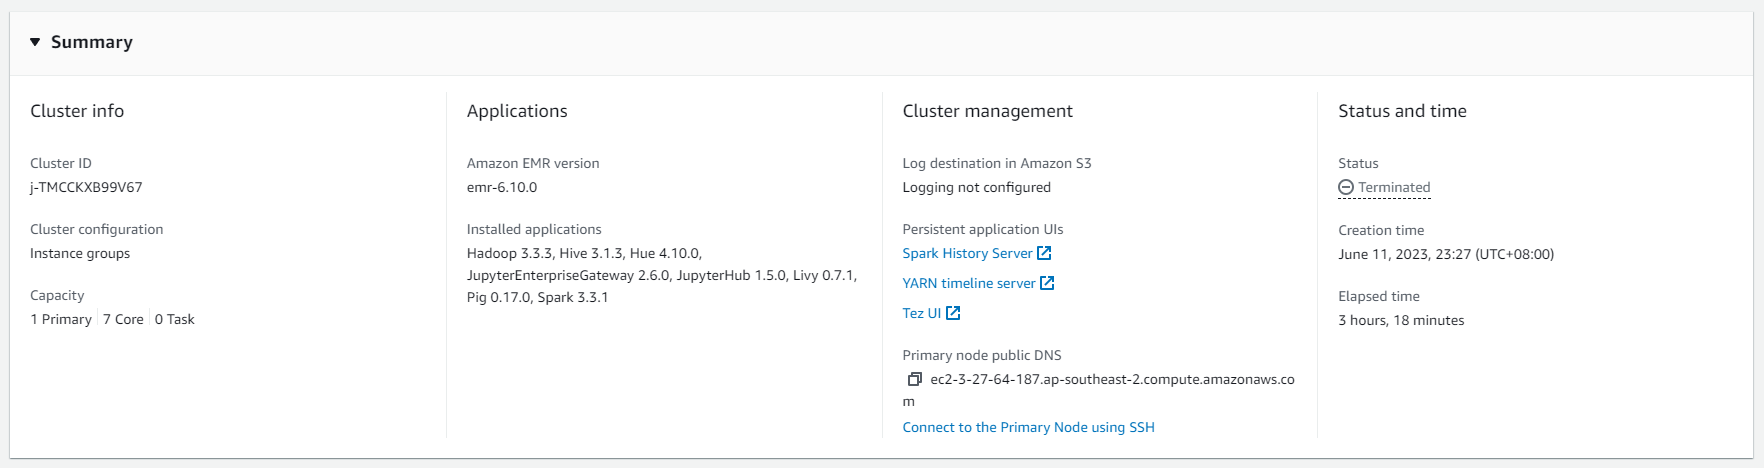

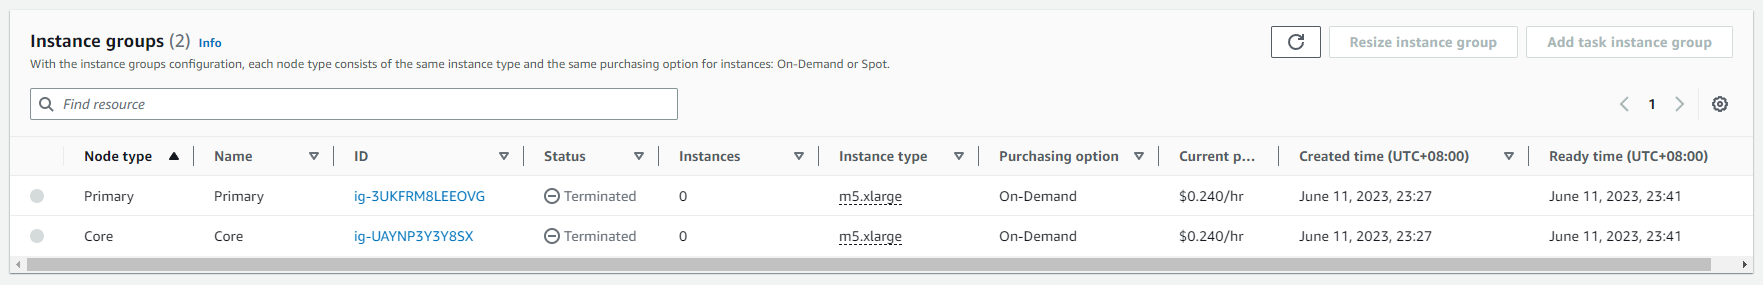

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">VI. Methodology</h1>

<center><img src="method.png" width="90%" height="90%"></center>

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 1. The Methodology Pipeline.</b><br>
        <i>This study involves collecting and processing Big Data on climate and weather events. <br>
            After preprocessing, the data undergone Feature Engineering such as Selection, Transformation, and Aggregation. <br>
            The engineered features were then used for Exploratory Data Analysis.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Data Collection & Reformatting</i></span>

`Spark`'s computational capabilities were used to collect a subset of the NOAA Global Historical Climatology Network Daily (GHCN-D), as detailed in Section IV, in multiple CSV files. As shown in the image below, the raw data is **28.94 Gb** in size. These were then reformatted and collated into Parquet files for more efficient reading and manipulation. The detailed steps done in reformatting and preprocessing are detailed in a supplementary notebook, **bdcc_lab2_dataprep.ipynb**.

<br>

<center><img src="bdcc_lab2_totalsize.png" width="65%" height="65%"></center>
<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 2. Total Size</b><br>
        <i>The total size of the raw data collected in GB.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Cleaning</i></span>

The converted Parquet files were then cleaned by removing missing values, casting some features such as `TMIN`, `TMAX`, and `PRCP` into their correct data type (i.e., numeric), and filtering temperature values between -45 and 65 Celcius. To ensure the correctness of the data, only records that passed quality checks as indicated by the `Q_FLAG` field were included.

```python
fpath = 's3://bdcc-lab2-2023/ghcnd/processed/ghcnd_processed_2023-06-05_14:50.parquet/'
fpath_country = 's3://noaa-ghcn-pds/ghcnd-countries.txt'
fpath_station = 's3://bdcc-lab2-2023/ghcnd/ghcnd_stations.csv/'

df = spark.read.parquet(fpath, header=True, inferSchema=True)
df_country = spark.read.text(fpath_country)
df_station = spark.read.csv(fpath_station, header=True, inferSchema=True)

# Parse the text data and create separate columns for Code and Country
df_country = df_country.withColumn("Code", split(trim(df_country["value"]), " ", 2).getItem(0)) \
                       .withColumn("Country", split(trim(df_country["value"]), " ", 2).getItem(1)) \
                       .select(['Code', 'Country'])

# Q_FLAG = Blank/Null -> did not fail any quality assurance check, else failed some quality check
df_cleaned = df.filter(df["Q_FLAG"].isNull()).select(data_cols)

# Joining the df_cleaned DataFrame with df_country DataFrame
df_cleaned_with_country = df_cleaned.join(df_country, df_cleaned["COUNTRY_CODE"] == df_country["Code"], "left").select(df_cleaned["*"], col("Country").alias("COUNTRY"))

# Convert fields into their appropriate data types
# Add info on the hour of observed date
df_cleaned_with_date = (df_cleaned_with_country
                        .withColumn("PRCP", col("PRCP").cast("float") / 10) # Convert PRCP to millimeters (mm)
                        .withColumn("TMAX", col("TMAX").cast("float") / 10) # Convert TMAX to degrees Celsius (°C)
                        .withColumn("TAVG", col("TAVG").cast("float") / 10) # Convert TAVG to degrees Celsius (°C)
                        .withColumn("TMIN", col("TMIN").cast("float") / 10) # Convert TMIN to degrees Celsius (°C)
                        .withColumn("HOUR_OF_DAY", substring(col("OBS_TIME"), 1, 2).cast("integer")) # Extract hour of day from OBS_TIME
                )

# Remove rows with null values in PRCP, TMAX, and TMIN
df_cleaned_no_nulls = df_cleaned_with_date.filter(col("PRCP").isNotNull() | col("TMAX").isNotNull() | col("TMIN").isNotNull())

# Filter temperature between -45C and 65C
df_cleaned_no_nulls = df_cleaned_no_nulls.filter(((col("TMIN") >= -45) | (col("TMIN").isNull())) &
                                                 ((col("TAVG") >= -45) | (col("TAVG").isNull())) &
                                                 ((col("TMAX") >= -45) | (col("TMAX").isNull())) &
                                                 ((col("TMIN") <= 65) | (col("TMIN").isNull())) &
                                                 ((col("TAVG") <= 65) | (col("TAVG").isNull())) &
                                                 ((col("TMAX") <= 65) | (col("TMAX").isNull())))

```

<span style="color:#f26419; font-size:18px"><i>Feature Engineering</i></span>

**Selection & Transformation**

The resulting preprocessed data has 34 mixed numerical and categorical features. This already includes information on weather-related events, the station that observed them, and their location. Due to the number of features, we only selected those with only a few missing values which are helpful to the analysis in this project.

Ultimately, only the following features shown below were used for analysis. The transformations done to get to this final set of features were also detailed in the supplementary notebook, **bdcc_lab2_dataprep.ipynb**.

<br>

<center><img src="final_data_schema.png" width="35%" height="35%"></center>
<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 3. Data schema</b><br>
        <i>The Spark DataFrame schema of the processed data.</i>
    </p>
</div>

**Addition & Aggregation**

To facilitate the climate assessment in this project, 3 indices were introduced: temperature index (`temp_index`), precipitation index (`prcp_index`), and climate index (`climate_index`) whose values range from 0-1. These indices are measures of variability of temperature, precipitation, and climate, respectively. The closer the index is to 1, the more unstable and dynamic the measure is.

The 3 indices were measured across time for the Global Temporal trends analysis, and by country level for the Regional analysis.

```python
# Aggregation for temporal analysis
yearly_indices = (df
                    .groupBy('YEAR')
                    .agg(F.avg(F.col('TAVG')).alias('avg_tavg'),
                         F.stddev(F.col('TAVG')).alias('std_tavg'),
                         F.avg(F.col('PRCP')).alias('avg_prcp'),
                         F.stddev(F.col('PRCP')).alias('std_prcp'))
                    .orderBy('YEAR')
                    )

# Aggregation for regional analysis
country_indices = (df
                    .groupBy('COUNTRY_CODE', 'COUNTRY', 'YEAR') #, 'LATITUDE', 'LONGITUDE'
                    .agg(F.avg(F.col('TAVG')).alias('avg_tavg'),
                         F.stddev(F.col('TAVG')).alias('std_tavg'),
                         F.avg(F.col('PRCP')).alias('avg_prcp'),
                         F.stddev(F.col('PRCP')).alias('std_prcp'))
                    .groupBy('COUNTRY_CODE', 'COUNTRY') #, 'LATITUDE', 'LONGITUDE'
                    .agg(F.avg(F.col('avg_tavg')).alias('avg_tavg'),
                         F.stddev(F.col('std_tavg')).alias('std_tavg'),
                         F.avg(F.col('avg_prcp')).alias('avg_prcp'),
                         F.stddev(F.col('std_prcp')).alias('std_prcp'))
                    .orderBy('COUNTRY')
                  )
```

***Temperature Index***

The standard deviation of the average temperature per year, $\sigma_{t_{avg}}$ given by `TAVG` was calculated. This was then scaled using the `RobustScaler` of `PySpark`'s `ml.feature` class to ensure that the index won't be dominated by extreme values.

Afterwards, the percentage ranking of the scaled feature, $\bar{\sigma}$ was determined to get a measure of high vs. low values.

Let $R_x$ be the percentile rank of the scaled feature, $x$:

\begin{align}
    R_x & = \frac{\text{Number of values below or equal to desired value}}{\text{Total number of values}} \times 100 \\
        & = \frac{cf_b + 0.5f_a}{N} \times 100
\end{align}

where $cf_b$ is the Cumulative Frequency below the value, $f_a$ is the frequency of the value, and $N$ is the total number of values observed.

***Precipitation Index***

The same process of calculating the standard deviation, scaling, then determining the percentage ranking was done for `PRCP` which is a measure of precipitation.

***Climate Index***

The climate index used in this project only considers variations in temperature and precipitation. Since equal weights are given to two, this is just the average of the temperature and precipitation index. A value close to 1 indicates that the period or country is vulnerable to the impacts of climate change.

<br>

```python
def scale_features(df, input_cols):
    """
    Return the scaled features.
    """
    assembler = VectorAssembler(inputCols=input_cols,
                                outputCol='indices',
                                handleInvalid = "skip")
    assembled_df = assembler.transform(df)

    # Scale the features
    scaler = RobustScaler(inputCol='indices', outputCol='scaled_indices')

    # Compute summary statistics and generate the scaler model
    scalerModel = scaler.fit(assembled_df)

    # Transform the DataFrame to apply the scaling
    df = scalerModel.transform(assembled_df)
    
    # Define a UDF to convert the vector column to a list
    to_array_udf = F.udf(lambda x: x.tolist() if x is not None else None, T.ArrayType(T.DoubleType()))

    df = df.withColumn('scaled_indices', to_array_udf('scaled_indices'))
    for index, c in enumerate(input_cols):
        df = df.withColumn(c + '_scaled', F.col('scaled_indices').getItem(index))
    
    # Return the resulting data after converting the vector column to an array
    return df.drop('indices', 'scaled_indices')
```

```python
def calc_indices(df, ordercol):
    """
    Return the percentile ranking of each row based on the 
    temp_index and prcp_index.
    """
    # Compute the percentile ranking
    return (df
              .withColumn('temp_index', F.percent_rank().over(Window.orderBy('std_tavg_scaled')))
              .withColumn('prcp_index', F.percent_rank().over(Window.orderBy('std_prcp_scaled')))
              .withColumn('climate_index', (F.col('temp_index') + F.col('prcp_index')) / 2)
              .orderBy(F.asc(ordercol))
           )
```

<span style="color:#f26419; font-size:18px"><i>Exploratory Data Analysis</i></span>

The exploration done in this project includes analysis of data quality, descriptive statistics, global temporal trends, and regional trends. The aggregated information saved into CSV files is used for visualization to avoid rerunning the data processing pipeline every time.

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">VII. Data Exploration</h1>

<h2 style="color:#003b7f">Raw Data</h2>

To start off the exploration of the raw data, let's first check its shape. The dataset contains over 872 million data points and has 8 columns.

In [4]:
shape_df = pd.read_csv('data/shape_df_all.csv')
shape_df

,num_rows,num_cols
0,872488410,8


<div>
    <p style="font-size:10px;font-style:default;text-align:left">
        <b>Table 4. The Raw Data Shape.</b><br>
    </p>
</div>

Next, let's assess the data quality of our raw data. This will help us understand the amount of cleaning required. Upon inspection, we found that the ID, Date, Element, Data value, and S Flag columns contain no null values. It is particularly important to note the absence of null values in the Data, Data value, and Element columns.

In [5]:
null_count_df = pd.read_csv('data/null_counts_all.csv')
null_count_df

,Column Name,Null Values
0,ID,0
1,DATE,0
2,ELEMENT,0
3,DATA_VALUE,0
4,M_FLAG,763562307
5,Q_FLAG,869921702
6,S_FLAG,0
7,OBS_TIME,542603408


<div>
    <p style="font-size:10px;font-style:default;text-align:left">
        <b>Table 5. The Raw Data Null Counts.</b><br>
    </p>
</div>

Next, let's perform a quick statistical analysis on the raw data by using the .describe() function on the raw PySpark DataFrame. The table below presents the summary statistics for the raw data:

In [6]:
describe_df_all = pd.read_csv('data/quick_stats/describe_df_all.csv')
describe_df_all

,summary,ID,DATE,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME
0,count,873039,8.730390e+05,873039,873039.000000,109032,2560,873039,329976.000000
1,mean,NaN,2.011288e+07,NaN,153.057607,NaN,NaN,3.011585600055868,963.656466
2,stddev,NaN,6.697136e+04,NaN,840.338698,NaN,NaN,3.465751067717828,519.593533
3,min,AE000041196,2.000010e+07,ACMH,-1.000000,B,D,0,0.000000
4,max,ZI000067983,2.023061e+07,WV20,9999.000000,T,Z,z,2400.000000


<div>
    <p style="font-size:10px;font-style:default;text-align:left">
        <b>Table 6. Raw Data Statistics.</b><br>
    </p>
</div>

<h2 style="color:#003b7f">Preprocessed Data</h2>

After applying the data preprocessing steps described in the methodology section of this notebook, we have obtained the preprocessed data, which will be used for further analysis. The preprocessed data consists of more than 259 million data points and includes 19 columns.

In [7]:
shape_df_all = pd.read_csv('data/shape_df.csv')
shape_df_all

,num_rows,num_cols
0,259425097,19


<div>
    <p style="font-size:10px;font-style:default;text-align:left">
        <b>Table 7. The Preprocessed Data Shape.</b><br>
    </p>
</div>

Next, we examine the presence of null values in the preprocessed data. It is important to note that null values in the columns PRCP, TMAX, TAVG, TMIN, LATITUDE, and LONGITUDE, which occur as a result of pivoting, are acceptable. These null values will be filtered out during the insights portion of this notebook.

In [8]:
null_count_df_all = pd.read_csv('data/null_counts.csv')
null_count_df_all

,Column Name,Null Values
0,ID,0
1,DATE,0
2,M_FLAG,243675532
3,Q_FLAG,259425097
4,S_FLAG,0
5,OBS_TIME,134640716
6,PRCP,22673906
7,TMAX,134563271
8,TAVG,212257472
9,TMIN,135570488


<div>
    <p style="font-size:10px;font-style:default;text-align:left">
        <b>Table 8. The Preprocessed Data Null Counts.</b><br>
    </p>
</div>

Next, we compute quick statistics on the processed data by applying the .describe() method to the PySpark DataFrame. This provides us with an overview of various statistical measures for each column in the processed data.

In [9]:
describe_df = pd.read_csv('data/quick_stats/describe_df.csv')
describe_df

,summary,ID,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,PRCP,TMAX,TAVG,TMIN,COUNTRY_CODE,STATE,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,COUNTRY,HOUR_OF_DAY
0,count,258404,16091,0.0,258404,124207.000000,235526.000000,124417.000000,47172.000000,123291.00000,258404,23694,142227.000000,131048.000000,258404.000000,258404.000000,258404.000000,258404,124207.000000
1,mean,NaN,NaN,NaN,3.1992068008821226,900.258794,2.556239,17.476382,10.712798,5.64615,NaN,135.2377415873639,40.423071,-47.485742,2011.638051,6.483174,15.745619,NaN,8.975275
2,stddev,NaN,NaN,NaN,3.4870665320289342,465.200017,8.301316,12.748696,13.057538,11.52926,NaN,207.02327841385588,11.875564,87.537029,6.651039,3.437672,8.813993,NaN,4.658417
3,min,AE000041196,B,NaN,0,0.000000,0.000000,-41.900000,-44.600000,-45.00000,AE,(CYCNA),-9.879000,-99.999600,2000.000000,1.000000,1.000000,Albania,0.000000
4,max,ZI000067983,T,NaN,z,2400.000000,304.000000,50.000000,41.700000,39.40000,ZI,ZUMPANGO DEL RIO,82.500000,999.700000,2023.000000,12.000000,31.000000,Zimbabwe,24.000000


<div>
    <p style="font-size:10px;font-style:default;text-align:left">
        <b>Table 9. The Preprocessed Data Statistics.</b><br>
    </p>
</div>

<h2 style="color:#003b7f">Univariate Analysis</h2>

After examining the quick statistics derived from both the raw and processed data, it is essential to conduct univariate analysis to gain a comprehensive understanding of important variables in isolation. The univariate analysis allows us to delve deeper into individual variables, exploring their distribution, central tendencies, and key characteristics. By conducting this analysis, we can extract valuable insights about the variables, which serve as the foundation for further analysis and decision-making.

In our univariate analysis, we will focus on examining the following variables:

1. **Precipitation:** We will analyze the distribution and patterns of precipitation, considering its skewed nature and the potential need for transformation to visualize non-zero values effectively.

2. **Maximum Temperature:** We will explore the distribution of maximum temperature, noting its negative skewness and identifying the median range between 20-30 degrees Celsius. It's important to mention that outliers have been removed, and the temperature range is from -45 to 65 degrees Celsius.

3. **Minimum Temperature:** Similarly to the maximum temperature, we will assess the distribution of minimum temperature, observing its negative skewness and identifying the median range between 5-15 degrees Celsius.

4. **Country:** We will examine the variable representing the country, noting the country with the highest number of climate data observations, followed by the second-ranked country. Notably, North America claims the top two-thirds of spots in terms of climate data observations.

5. **Year:** We will analyze the data collected by year and observe any noticeable trends or patterns. In particular, we will highlight a significant increase in data observations between 2005 and 2010, suggesting a boost in research initiatives and technological advancements during that period.

6. **Month:** We will investigate the distribution of data observations across different months, identifying any seasonal patterns or variations.

7. **Day:** Finally, we will assess the distribution of data observations across days of the month, looking for any specific day-to-day trends or patterns.

<span style="color:#f26419; font-size:18px"><i>Precipitation</i></span>

First, we examine the distribution of precipitation. Initially, it was intuitively expected that the data would be predominantly concentrated around 0 precipitation, considering that a majority of days typically experience no precipitation. However, upon plotting the data, it becomes evident that the occurrence of 0 precipitation is much more prevalent than anticipated. To visualize the non-zero values effectively, a transformation may be required to adjust the scale and highlight the variations in precipitation beyond 0.

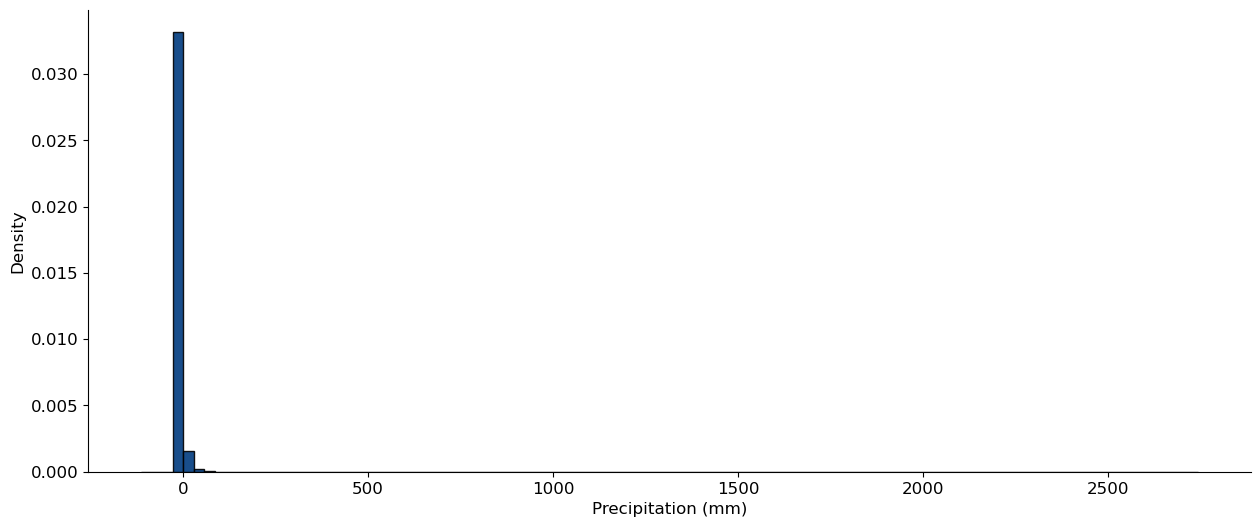

In [10]:
histogram_prcp = pd.read_csv('data/univariate_analysis/histogram_prcp.csv')

# Plot the histogram using the DataFrame
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(histogram_prcp['Bins'],
       histogram_prcp['Count'],
       width=histogram_prcp['Bins'][1] - histogram_prcp['Bins'][0],
       edgecolor='black',
       color='#003b7f',
       alpha=0.9)

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel("Precipitation (mm)", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
# ax.set_title("Distribution of Precipitation", fontsize=12)

# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 4. Distribution of Precipitation</b><br>
        <i>Density of precipitation values in millimeters.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Precipitation in Log Scale</i></span>

By applying a logarithmic scale, the distribution of precipitation becomes more visually discernible, revealing a positive skewness. This transformation helps to accentuate the variations in precipitation values, especially those beyond the 0 mark. As a result, the distribution appears more pronounced, providing a clearer understanding of the distributional characteristics and highlighting any potential patterns or outliers present in the data.

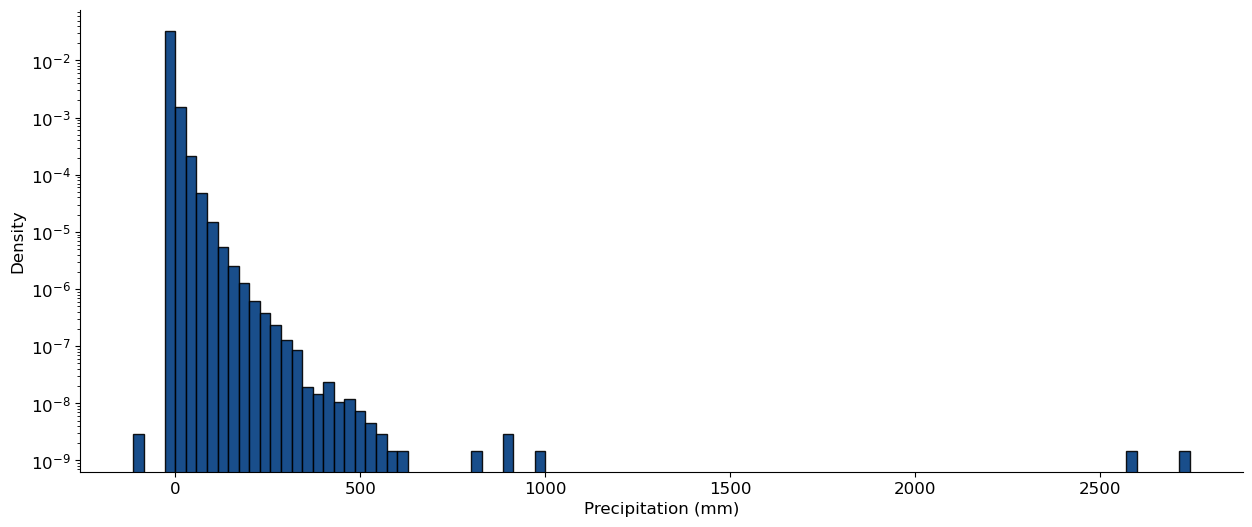

In [11]:
# Plot the histogram using the DataFrame
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(histogram_prcp['Bins'],
       histogram_prcp['Count'],
       width=histogram_prcp['Bins'][1] - histogram_prcp['Bins'][0],
       edgecolor='black',
       color='#003b7f',
       alpha=0.9)

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel("Precipitation (mm)", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
# ax.set_title("Distribution of Precipitation", fontsize=12)

# show plot
plt.yscale('log')  # Apply log scale to y-axis
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 5. Distribution of Precipitation (Log).</b><br>
        <i>Density of Precipitation values in millimeters in Log scale.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Maximum Temperature</i></span>

Upon analyzing the distribution of the maximum temperature, it becomes apparent that the distribution exhibits a negative skew. This indicates that the majority of the data is concentrated toward higher temperature values. The median value of the maximum temperature falls within the range of 22-28 degrees Celsius, suggesting that this range is representative of the central tendency of the data.

*It is important to note that outliers in the temperature data have been removed before this analysis. The temperature range considered in this analysis spans from -45 to 65 degrees Celsius, still covering a wide spectrum of temperature values.*

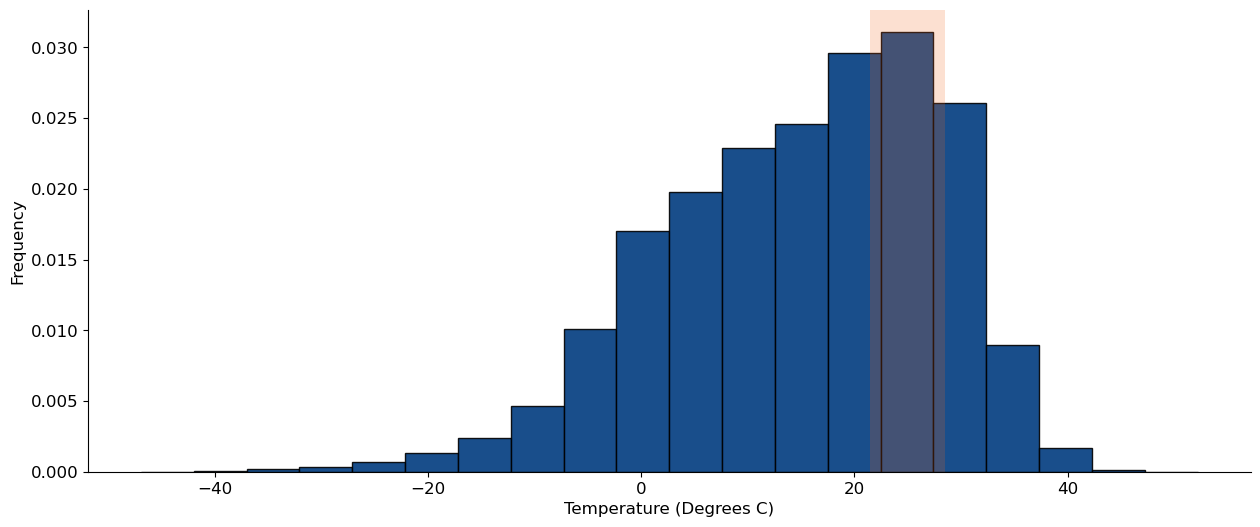

In [12]:
histogram_tmax = pd.read_csv('data/univariate_analysis/histogram_tmax.csv')

# Plot the histogram using the DataFrame
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(histogram_tmax['Bins'],
       histogram_tmax['Count'],
       width=histogram_tmax['Bins'][1] - histogram_tmax['Bins'][0],
       edgecolor='black',
       color='#003b7f',
       alpha=0.9)

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.axvspan(21.5, 28.5, facecolor='#f26419', alpha=0.2)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel("Temperature (Degrees C)", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
# ax.set_title("Distribution of Maximum Temperature (TMAX)", fontsize=12)

# show plot
plt.show()


<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 6. Maximum Temperature</b><br>
        <i>Distribution of Maximum Temperature values.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Minimum Temperature</i></span>

When examining the distribution of the minimum temperature, similar characteristics to the maximum temperature distribution are observed. The distribution is negatively skewed, indicating that the majority of the data is concentrated toward higher minimum temperature values. However, the median value for the minimum temperature falls within the range of 5-12 degrees Celsius, which is notably lower compared to the median of the maximum temperature.

*It is worth noting that, similar to the maximum temperature, outliers in the minimum temperature data have been removed before this analysis. The temperature range considered in this analysis spans from -45 to 65 degrees Celsius, encompassing a wide range of temperature values.*

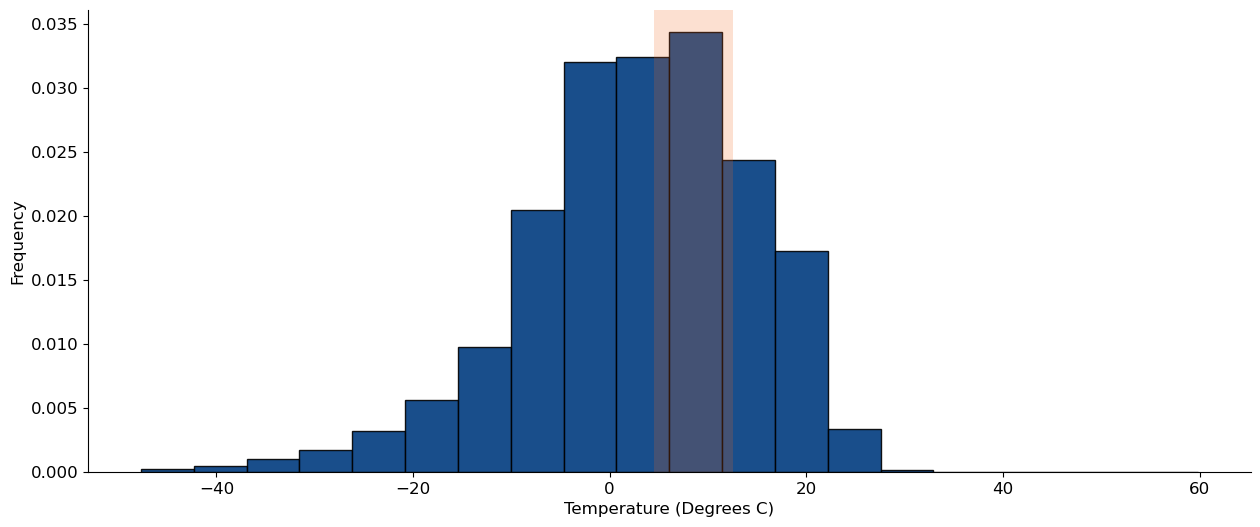

In [13]:
histogram_tmin = pd.read_csv('data/univariate_analysis/histogram_tmin.csv')

# Plot the histogram using the DataFrame
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(histogram_tmin['Bins'],
       histogram_tmin['Count'],
       width=histogram_tmin['Bins'][1] - histogram_tmin['Bins'][0],
       edgecolor='black',
       color='#003b7f',
       alpha=0.9)

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.axvspan(4.5, 12.5, facecolor='#f26419', alpha=0.2)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)


# labels
ax.set_xlabel("Temperature (Degrees C)", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
# ax.set_title("Distribution of Minimum Temperature (TMIN)", fontsize=12)

# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 7. Minimum Temperature</b><br>
        <i>Distribution of Minimum Temperature values.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Country</i></span>

Moving on to the analysis of the country variable, we find that the United States stands out as the country with the highest number of climate data observations in the dataset. Australia follows closely in second place, although there is a noticeable difference in the number of observations between Australia and the United States. Canada takes the third spot, highlighting the dominance of North America in terms of climate data collection, as it claims the top two out of the three positions.

This insight into the distribution of climate data observations across different countries provides valuable information about the geographical coverage and data availability for each region. The concentration of observations in North America suggests a strong focus on collecting climate data in this region, which could be attributed to factors such as research initiatives, weather monitoring systems, and data collection infrastructure. Understanding the distribution of climate data by country helps to contextualize the dataset and provides a basis for further regional and comparative analyses.

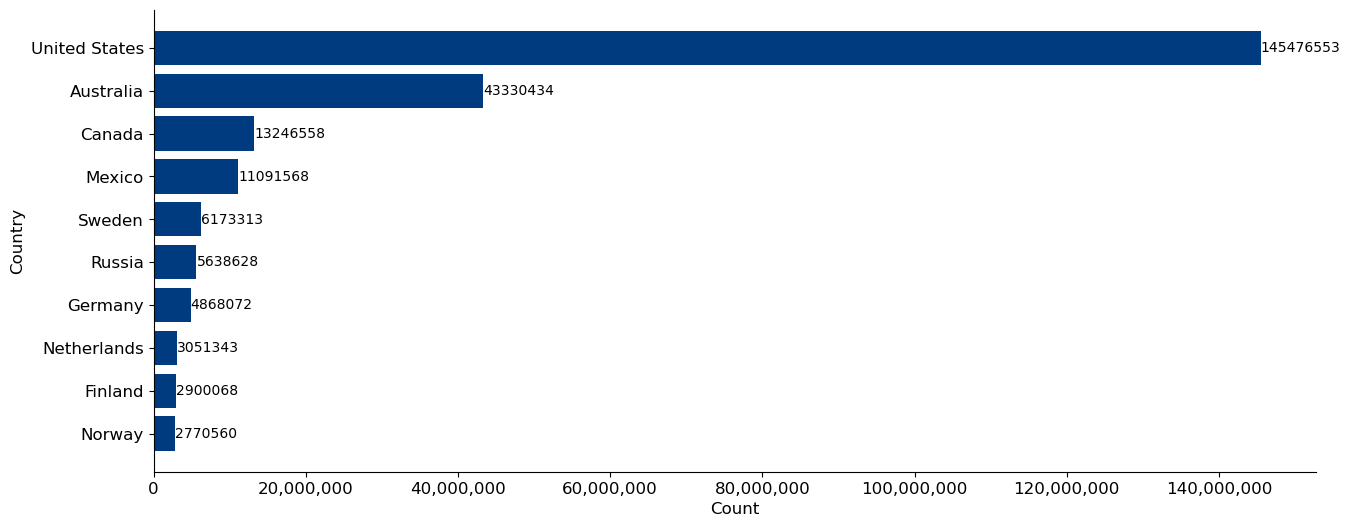

In [14]:
country_count_df = pd.read_csv('data/univariate_analysis/country_count_df.csv')

# Visualize the DataFrame
fig, ax = plt.subplots(figsize=(15, 6))

plt.barh(country_count_df["Country"], country_count_df["Count"], color='#003b7f')

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.xaxis.set_major_formatter(formatter)
ax.axvspan(5.5, 8.5, facecolor='#f26419', alpha=0.2)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Country", fontsize=12)
# ax.set_title("", fontsize=12)

# Add data labels to the bars
for i, count in enumerate(country_count_df["Count"]):
    plt.text(count, i, str(count), ha="left", va="center")

# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 8. Country records</b><br>
        <i>Number of recorded measurements by country.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Year</i></span>

Examining the data collected by year, we observe a significant increase in the number of observations between 2005 and 2010. This suggests a potential boost in research initiatives and advancements in climate data collection technologies during that period. However, starting from 2010, the yearly data observations appear to have reached a plateau, indicating a relatively stable level of data collection in subsequent years.

The spike in observations between 2005 and 2010 could be attributed to various factors such as increased funding for climate research, improved data-gathering techniques, or the implementation of new monitoring systems. The subsequent plateau in data observations suggests that the rate of growth in data collection may have leveled off, indicating a more consistent and sustained effort in climate data collection during recent years.

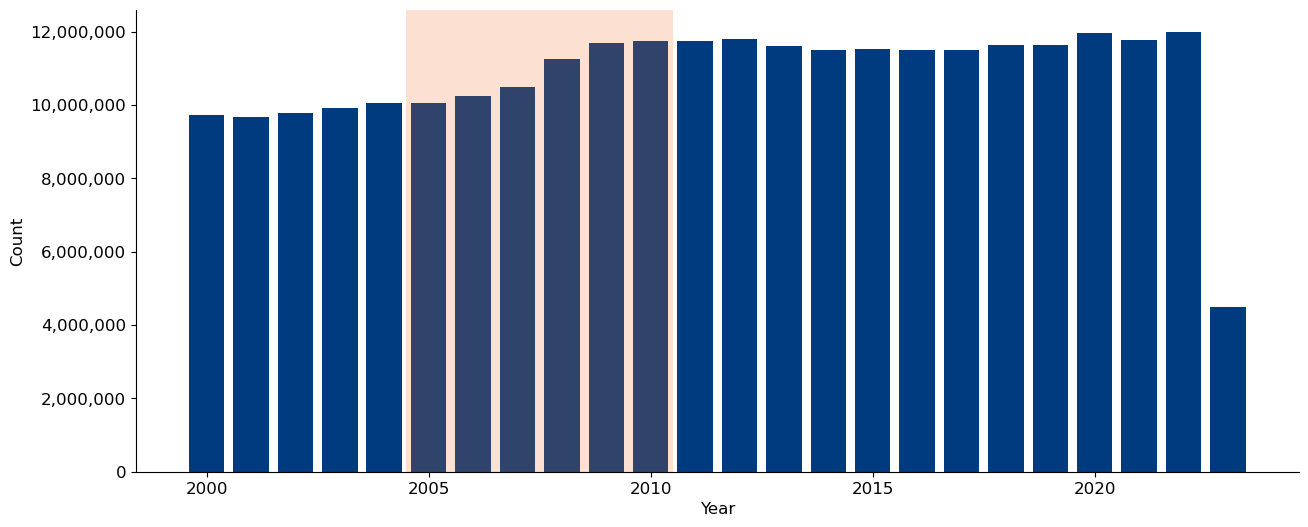

In [15]:
year_counts = pd.read_csv('data/univariate_analysis/year_counts.csv')

# Create a histogram for "YEAR" counts
fig, ax = plt.subplots(figsize=(15, 6))

plt.bar(year_counts["YEAR"], year_counts["count"], color='#003b7f')

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)
ax.axvspan(2004.5, 2010.5, facecolor='#f26419', alpha=0.2)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
# ax.set_title("Distribution of Data by Year", fontsize=12)

# show plot
plt.show()


<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 9. Distribution of Data by Year</b><br>
        <i>Number of records by Year.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Month</i></span>

Analyzing the month column, we find no significant seasonality in terms of data collection. However, an interesting observation emerges regarding the number of data observations in each month. Months with 31 days (January, March, May, July, August, October, and December) exhibit larger amounts of data compared to months with 30 days or fewer. Notably, February, with only 28 days, has the fewest data observations.

It is worth noting that if the data were normalized to retain a consistent 30-day collection period, the number of data observations per month would level out, mitigating the apparent discrepancy between months. This normalization would provide a more balanced representation of data across the year.

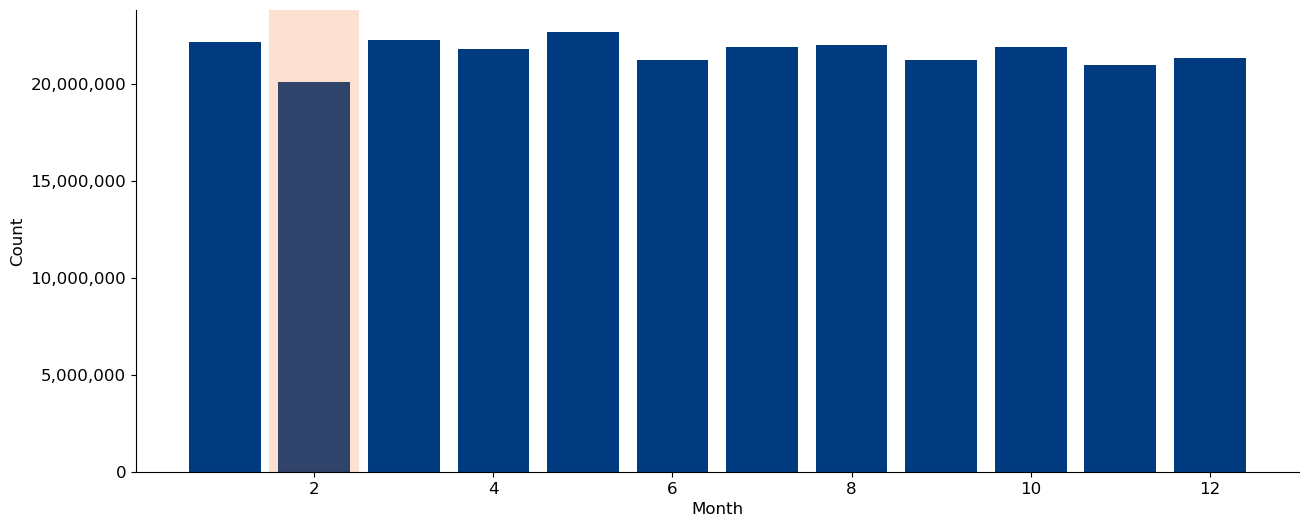

In [16]:
month_counts = pd.read_csv('data/univariate_analysis/month_counts.csv')

# Create a histogram for "MONTH" counts
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(month_counts["MONTH"], month_counts["count"], color='#003b7f')

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)
ax.axvspan(1.5, 2.5, facecolor='#f26419', alpha=0.2)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
# ax.set_title("Distribution of Data by Month", fontsize=12)

# show plot
plt.show()


<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 10. Distribution of Data by Month</b><br>
        <i>Number of records by Month.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Day</i></span>

Examining the daily data observations, we observe a relatively consistent level of data collection from days 1 to 28. However, a notable decrease in data collection is observed for days 29, 30, and 31. It is important to note that this decrease is not attributed to the specific days themselves but rather to their frequency within each month.

Day 29 is present in approximately 11.25 out of 12 months, day 30 is present in 11 out of 12 months, and day 31 is present in only 7 out of 12 months. This discrepancy in the number of days across months contributes to the lower data collection totals observed for days 29, 30, and 31.

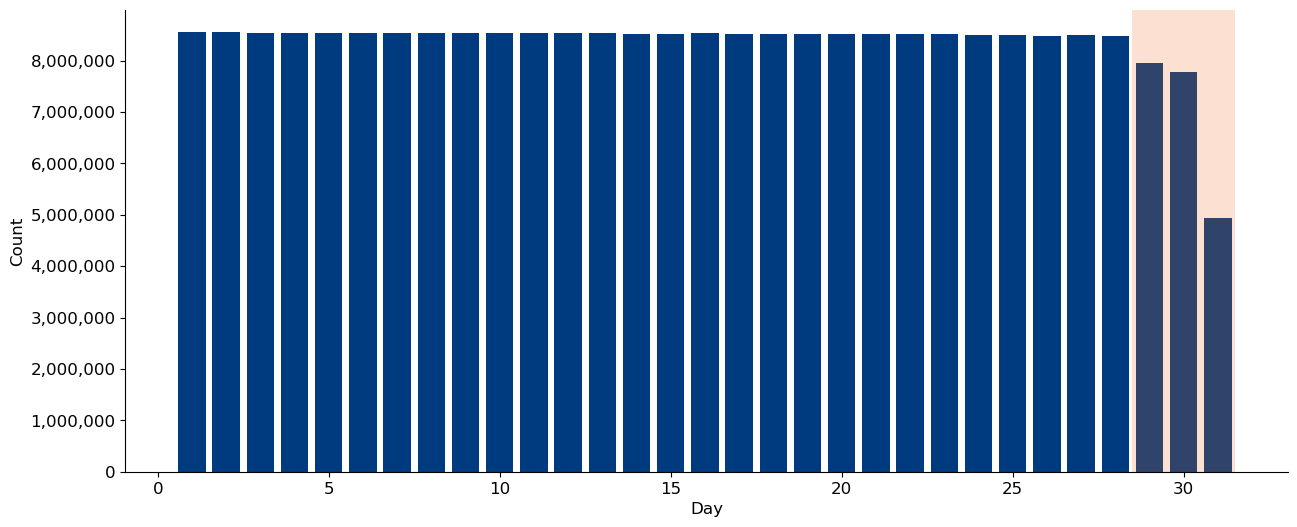

In [17]:
day_counts = pd.read_csv('data/univariate_analysis/day_counts.csv')

# Create a histogram for "DAY" counts
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(day_counts["DAY"], day_counts["count"],
        color='#003b7f')

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)
ax.axvspan(28.5, 31.5, facecolor='#f26419', alpha=0.2)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel("Day", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
# ax.set_title("Distribution of Data by Day", fontsize=12)

# show plot
# plt.grid(True, linewidth=0.25)
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 11. Distribution of Data by Day</b><br>
        <i>Number of records per day.</i>
    </p>
</div>

<h2 style="color:#003b7f">Bivariate Analysis</h2>

Moving on to the bivariate analysis, we will explore the relationships between different variables to gain deeper insights into the data. Specifically, we will focus on the following aspects:

1. **Maximum Temperature vs Minimum Temperature:** By examining the relationship between maximum and minimum temperatures, we can assess the temperature range and identify any patterns or correlations between these variables.

2. **Average Maximum Temperature over the Years:** This analysis will provide an overview of how the average maximum temperature has changed over time. By tracking these trends, we can identify any long-term temperature patterns or shifts.

3. **Average Minimum Temperature over the Years:** Similar to the previous analysis, we will explore the average minimum temperature over the years to understand how it has evolved and detect any notable trends or variations.

4. **Average Precipitation over the Years:** This analysis will focus on the average precipitation levels over time. By studying the changes in precipitation patterns, we can gain insights into the overall precipitation trends and potential shifts in rainfall amounts.

5. **Average Maximum Temperature per Month:** By examining the average maximum temperature per month, we can identify any seasonal patterns or variations in temperature within each month. This analysis will provide a deeper understanding of how temperatures fluctuate throughout the year.

6. **Average Minimum Temperature per Month:** Similar to the previous analysis, we will explore the average minimum temperature per month to uncover any seasonal temperature patterns or variations within each month.

7. **Average Precipitation per Month:** This analysis will focus on the average precipitation levels per month. By studying the monthly precipitation patterns, we can gain insights into the seasonal distribution of rainfall and potential variations in precipitation amounts.

<span style="color:#f26419; font-size:18px"><i>Maximum Temperature vs Minimum Temperature</i></span>

In the scatter plot, we visualize the relationship between the maximum temperature (TMAX) and the minimum temperature (TMIN). The plot reveals a positive linear correlation between these two variables. As TMIN increases, there is a tendency for TMAX to also increase, indicating a general pattern of warmer minimum temperatures corresponding to warmer maximum temperatures.

Although the scatter plot appears wide, suggesting some level of variability, the overall trend demonstrates the positive relationship between TMAX and TMIN. This correlation provides insights into how changes in minimum temperatures may influence maximum temperatures. Further analysis can be conducted to quantify the strength of this correlation and assess its significance in the context of climate patterns and temperature variations.

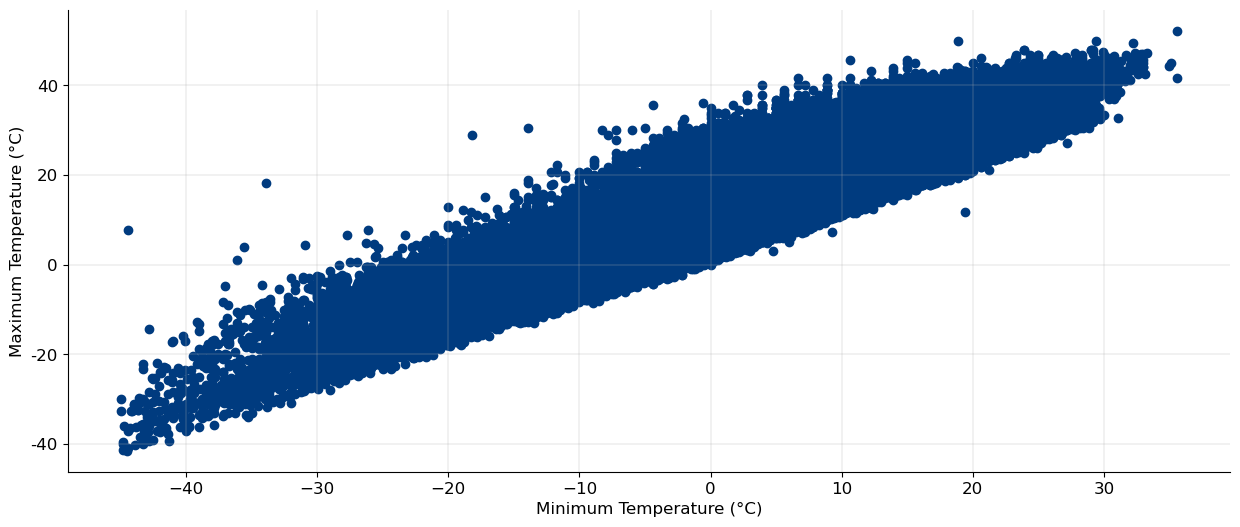

In [18]:
tmax_tmin_df = pd.read_csv('data/bivariate_analysis/tmax_tmin_df.csv')

# Plotting TMAX vs TMIN
fig, ax = plt.subplots(figsize=(15, 6))

ax.scatter(tmax_tmin_df['TMIN'], tmax_tmin_df['TMAX'],
           marker='o',
           color='#003b7f')

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel("Minimum Temperature (°C)", fontsize=12)
ax.set_ylabel("Maximum Temperature (°C)", fontsize=12)
# ax.set_title("Scatter Plot: TMAX vs TMIN", fontsize=12)

# show plot
plt.grid(True, linewidth=0.25)
plt.show()


<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 12. Scatter Plot: TMAX vs. TMIN</b><br>
        <i>Relationship between Maximum and Minimum Temperature.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Average Maximum Temperature over the Years</i></span>

The line plot illustrates the average maximum temperature (TMAX) over the years. The plot reveals a notable decreasing trend in the average TMAX values. While it may seem contradictory to the perception of global warming, it is important to note that short-term variations and regional climate patterns can influence yearly temperature trends.

Global warming refers to the long-term increase in average global temperatures over several decades. However, within this broader trend, there can be fluctuations and regional variations that impact year-to-year temperature observations. Factors such as natural climate variability, including El Niño and La Niña events, volcanic activity, and atmospheric circulation patterns, can contribute to short-term temperature variations that may counteract the overall warming trend. [14, 15, 16]

Additionally, localized climate dynamics and regional variations in weather patterns can influence average TMAX values on a yearly basis. It is crucial to analyze long-term temperature data and consider multi-decadal trends to assess the overall impact of global warming. While the average TMAX may display a decreasing pattern in certain years, the broader context of climate change and global warming necessitates a comprehensive analysis of long-term data trends to draw accurate conclusions.

Further investigation, including statistical analysis and examining temperature trends over extended periods, would be necessary to provide a more comprehensive understanding of the relationship between global warming and annual average TMAX values.

*Therefore, it is more appropriate to describe climate change and consider additional factors such as variability when creating a temperature index. This approach will yield a more accurate representation of climate change. We will explore this concept further in the global temporal trend analysis.*

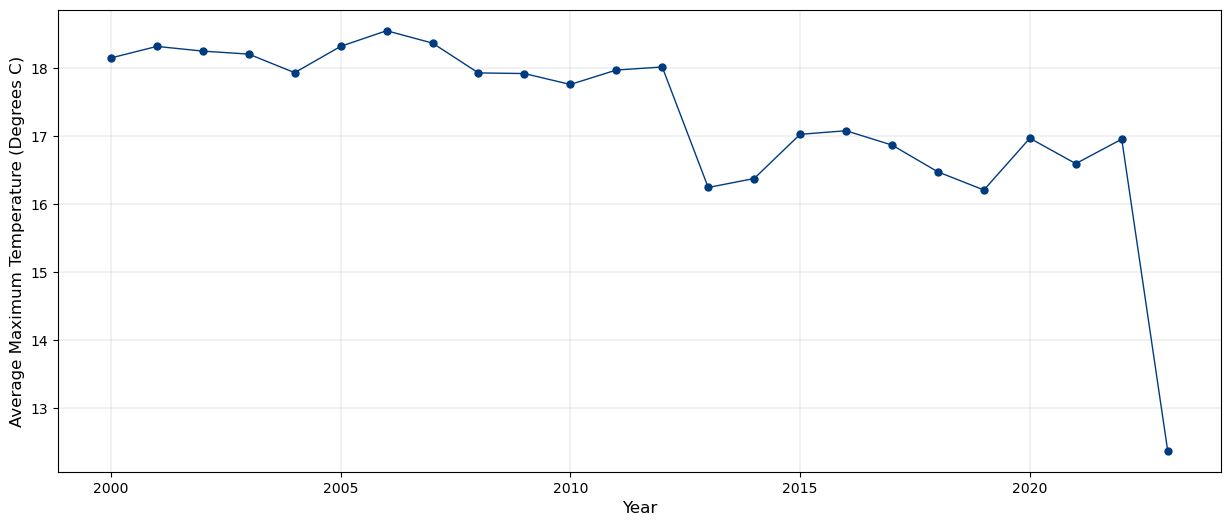

In [19]:
tmax_years_df = pd.read_csv('data/bivariate_analysis/tmax_years_df.csv')

# Plotting average TMAX over the years
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(tmax_years_df['years'],
        tmax_years_df['avg_tmax_values'],
        marker='o', markersize=5,
        color='#003b7f',
        linestyle='-',
        linewidth=1)

# labels
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Average Maximum Temperature (Degrees C)", fontsize=12)
# ax.set_title("Line Plot: Average TMAX over the Years", fontsize=12)

# show plot
plt.grid(True, linewidth=0.25)
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 13. Line Plot: Average TMAX over the Years</b><br>
        <i>Changes in the Avg. Max Temperature over the years.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Average Minimum Temperature over the Years</i></span>

he line plot of the average minimum temperature (TMIN) over the years also reveals a decreasing trend. Although this might seem contradictory to the concept of global warming, it is essential to recognize that short-term fluctuations and regional climate variations can influence yearly temperature patterns. Global warming refers to the long-term increase in average global temperatures, but it does not guarantee that every individual year will exhibit higher temperatures than the previous year.

Various factors, including natural climate variability, localized weather phenomena, and regional influences, can contribute to fluctuations in minimum temperatures from year to year. These variations can obscure the overall warming trend within certain timeframes and specific regions. Moreover, other climatic factors such as precipitation patterns and atmospheric circulation can significantly impact temperature trends.

*Therefore, it is more appropriate to describe climate change and consider additional factors such as variability when creating a temperature index. This approach will yield a more accurate representation of climate change. We will explore this concept further in the global temporal trend analysis.*

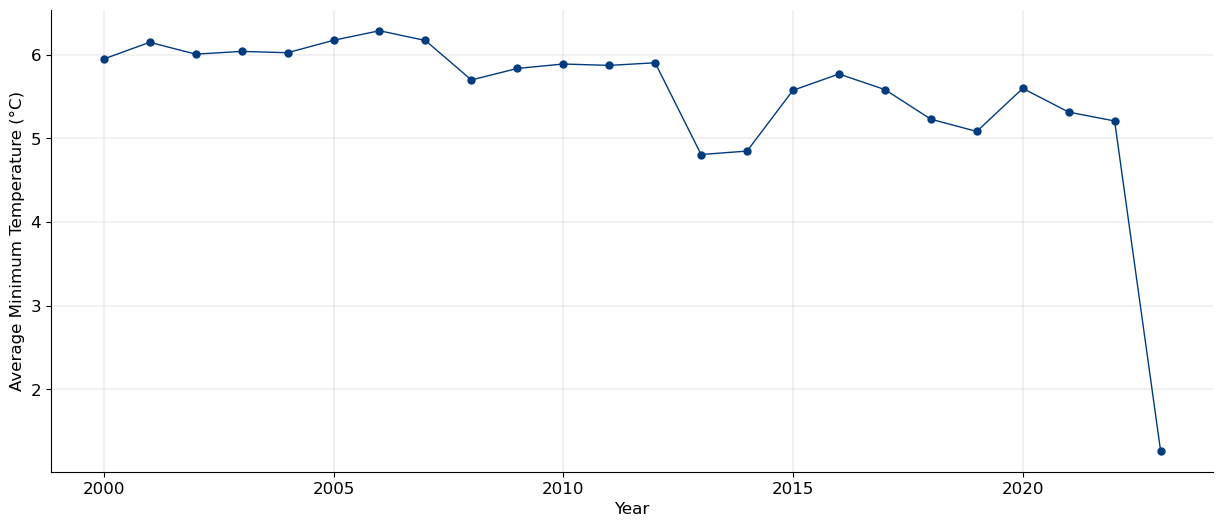

In [20]:
tmin_years_df = pd.read_csv('data/bivariate_analysis/tmin_years_df.csv')

# Plotting average TMIN over the years
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(tmin_years_df['years'],
        tmin_years_df['avg_tmin_values'],
        marker='o',
        markersize=5,
        color='#003b7f',
        linestyle='-',
        linewidth=1)

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Average Minimum Temperature (°C)", fontsize=12)
# ax.set_title("Line Plot: Average TMIN over the Years", fontsize=12)

# show plot
plt.grid(True, linewidth=0.25)
plt.show()


<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 14. Line Plot: Average TMIN over the Years</b><br>
        <i>Changes in the Avg. Min Temperature over the years.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Average Precipitation over the Years</i></span>

The increase in average precipitation over the years is a significant trend that can be attributed to climate change. As global temperatures rise, the atmosphere can hold more moisture, leading to increased rainfall. This intensification of the hydrological cycle results in more frequent and heavier precipitation events. These changes have implications for water resources, ecosystems, and human societies, highlighting the need for effective adaptation strategies and sustainable water management practices. Understanding and monitoring this trend in average precipitation is crucial for addressing the impacts of climate change and ensuring resilience in the face of changing precipitation patterns.

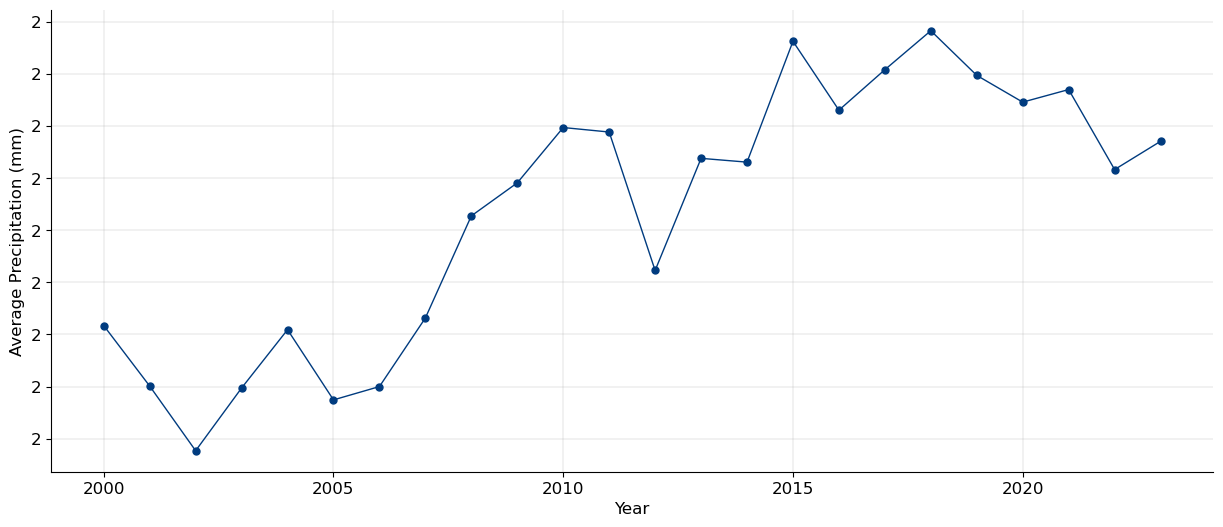

In [21]:
prcp_years_df = pd.read_csv('data/bivariate_analysis/prcp_years_df.csv')

# Plotting average PRCP over the years
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(prcp_years_df['years'],
        prcp_years_df['avg_prcp_values'],
        marker='o',
        markersize=5,
        color='#003b7f',
        linestyle='-',
        linewidth=1)

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Average Precipitation (mm)", fontsize=12)
# ax.set_title("Line Plot: Average Precipitation over the Years", fontsize=12)

# show plot
plt.grid(True, linewidth=0.25)
plt.show()


<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 15. Line Plot: Average Precipitation over the Years</b><br>
        <i>Changes in the Avg. Precipitation over the years.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Average Maximum Temperature Per Month</i></span>

The line plot depicting the average maximum temperature (TMAX) across different months reveals a distinct seasonal pattern. The plot showcases a parabolic trend, with the highest average TMAX occurring during the summer months of June, July, and August. This observation aligns with expectations, as these months typically experience warmer weather in many regions. As the year progresses from winter to summer, the average TMAX gradually increases, reaching its peak during the summer season. Conversely, during the winter months, the average TMAX decreases, reflecting the cooler temperatures associated with the season.

Understanding the seasonal variation in average TMAX is valuable for various sectors, such as agriculture, tourism, and energy management, as it helps anticipate and prepare for weather-related impacts during specific months of the year.

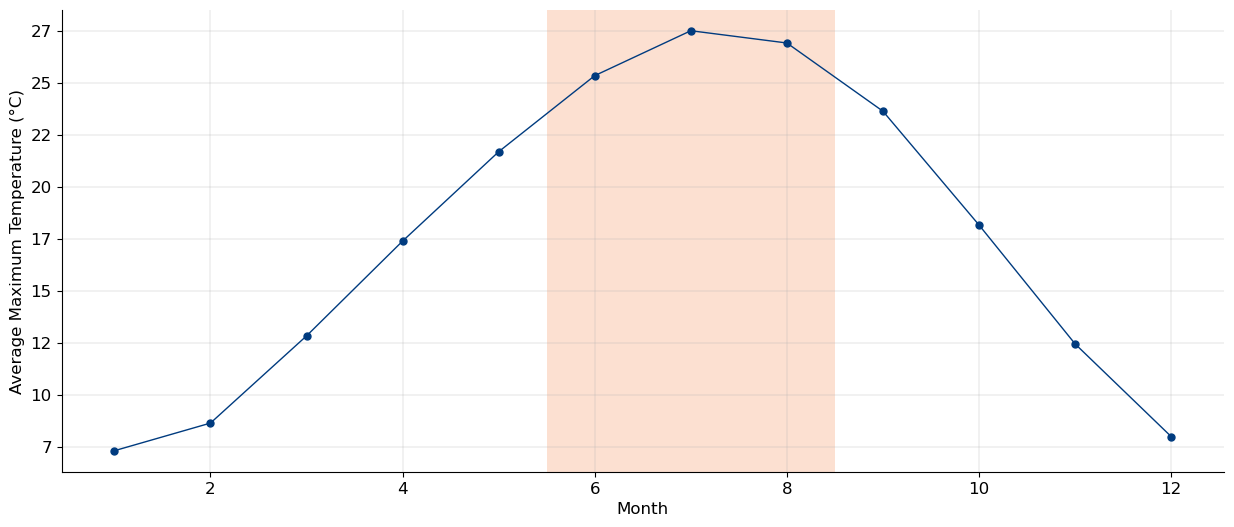

In [22]:
tmax_months_df = pd.read_csv('data/bivariate_analysis/tmax_months_df.csv')

# Plotting average TMIN over the months
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(tmax_months_df['months'],
        tmax_months_df['avg_tmax_values'],
         marker='o', markersize=5,
         color='#003b7f',
         linestyle='-',
         linewidth=1)

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)
ax.axvspan(5.5, 8.5, facecolor='#f26419', alpha=0.2)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Average Maximum Temperature (°C)", fontsize=12)
# ax.set_title("Line Plot: Average Maximum Temperature vs. Month", fontsize=12)

# show plot
plt.grid(True, linewidth=0.25)
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 16. Line Plot: Average Maximum Temperature vs. Month</b><br>
        <i>Changes in the Monthly Avg. Max Temperature.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Average Minimum Temperature Per Month</i></span>

Similarly, the line plot showcasing the average minimum temperature (TMIN) across different months reveals a similar seasonal pattern. The plot exhibits a parabolic trend, with the lowest average TMIN occurring during the summer months of June, July, and August. 

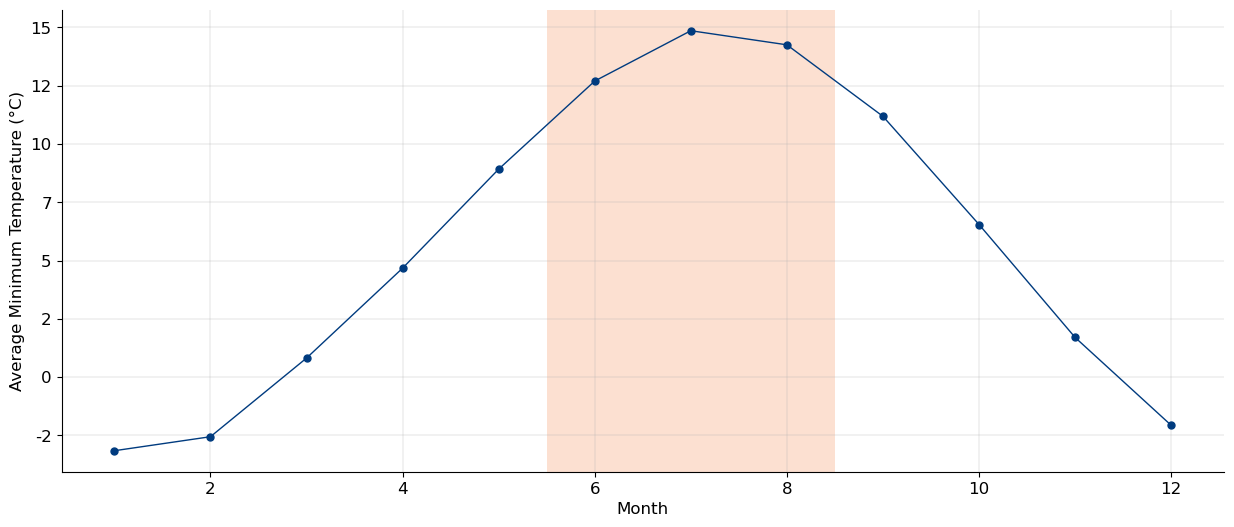

In [23]:
tmin_months_df = pd.read_csv('data/bivariate_analysis/tmin_months_df.csv')

# Plotting average TMIN over the months
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(tmin_months_df['months'],
        tmin_months_df['avg_tmin_values'],
         marker='o', markersize=5,
         color='#003b7f',
         linestyle='-',
         linewidth=1)

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)
ax.axvspan(5.5, 8.5, facecolor='#f26419', alpha=0.2)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Average Minimum Temperature (°C)", fontsize=12)
# ax.set_title("Line Plot: Average Minimum Temperature vs. Month", fontsize=12)

# show plot
plt.grid(True, linewidth=0.25)
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 17. Line Plot: Average Minimum Temperature vs. Month</b><br>
        <i>Changes in the Monthly Avg. Min Temperature.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Average Precipitation Per Month</i></span>

The analysis of average precipitation per month unveils a distinct seasonal pattern, with June, July, and August consistently exhibiting the highest levels of precipitation. This observation can be attributed to several factors. 

- Firstly, these months often coincide with the summer season in many regions, which is characterized by increased atmospheric moisture and higher chances of rainfall.
- Additionally, the presence of specific weather systems, such as tropical storms or monsoons, during this period can contribute to enhanced precipitation levels. 
- Furthermore, the higher temperatures experienced in the summer months can lead to increased evaporation and moisture accumulation in the atmosphere, subsequently resulting in more frequent and intense rainfall events.

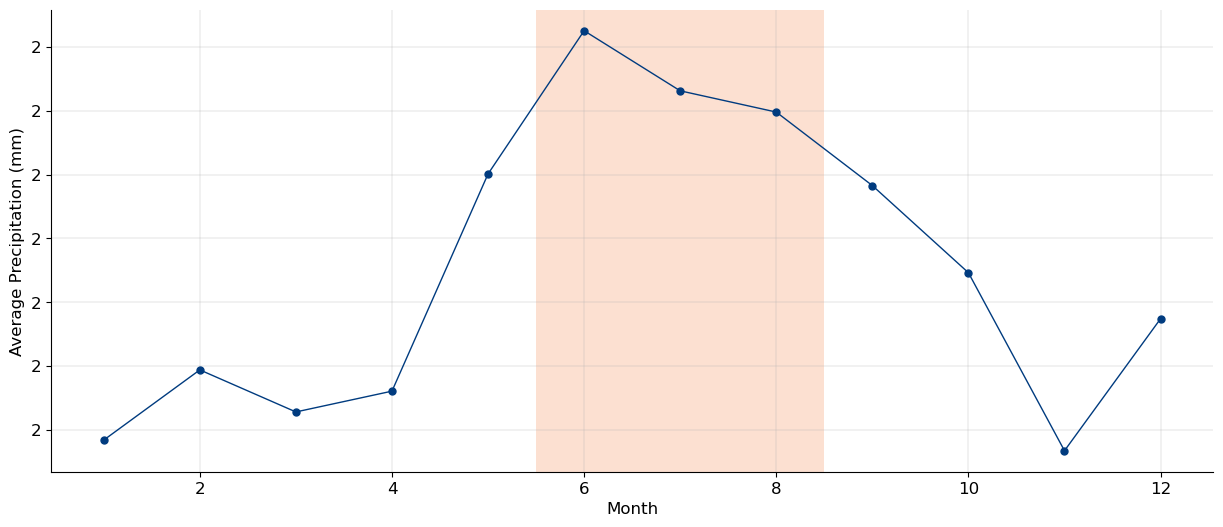

In [24]:
prcp_months_df = pd.read_csv('data/bivariate_analysis/prcp_months_df.csv')

# Plotting average PRCP over the months
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(prcp_months_df['months'],
        prcp_months_df['avg_prcp_values'],
        marker='o', markersize=5,
        color='#003b7f',
        linestyle='-',
        linewidth=1)

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)
ax.axvspan(5.5, 8.5, facecolor='#f26419', alpha=0.2)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Average Precipitation (mm)", fontsize=12)
# ax.set_title("Line Plot: Average Precipitation vs. Month", fontsize=12)

# show plot
plt.grid(True, linewidth=0.25)
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 18. Line Plot: Average Precipitation vs. Month</b><br>
        <i>Changes in the Monthly Avg. Precipitation.</i>
    </p>
</div>

----
<h2 style="color:#003b7f">Global Temporal Trend Analysis</h2>

In this section, we look at the temperature, precipitation, and climate across the globe vary on a yearly basis. As detailed in Section VI. Methodology under Feature Engineering, these measures of variation are reflected by the `temp_index`, `prcp_index`, and `climate_index` fields, respectively.

In [25]:
# load data on indices by year
yearly_indices = pd.read_csv('data/yearly_indices.csv')

<span style="color:#f26419; font-size:18px"><i>How did temperature vary over time?</i></span>

The year 2012 recorded the highest variation in temperature, followed by 2010, with a recorded temperature index of 1 and ~0.96, respectively. These notable variations in temperature may pose implications for climate change. The increased frequency and intensity of extreme weather events, including heatwaves and cold snaps, can disrupt ecosystems, and pose risks to human health and infrastructure.

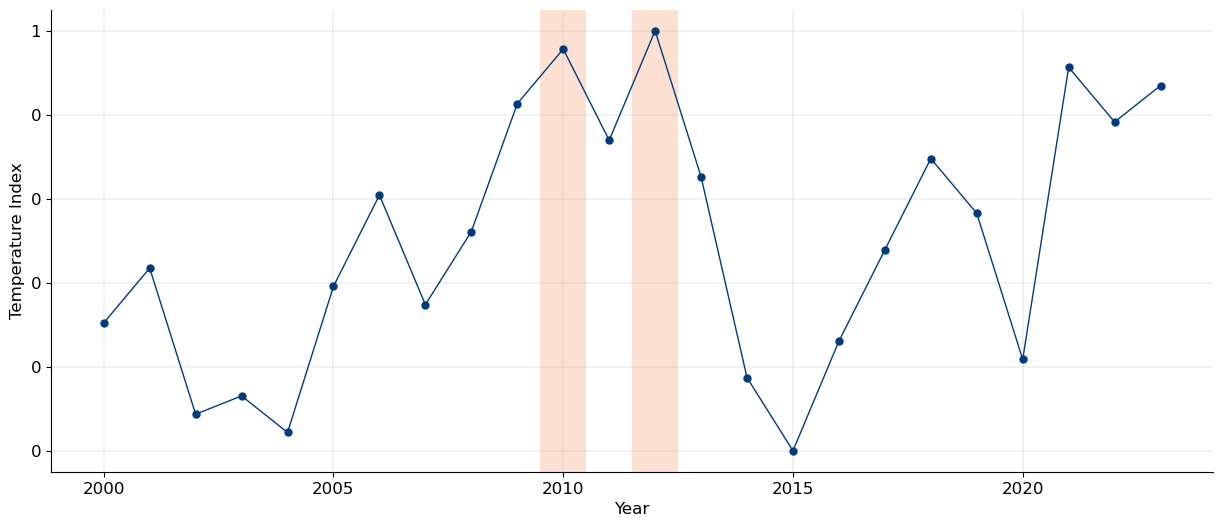

In [26]:
# figure size
fig, ax = plt.subplots(figsize=(15, 6))

# plot line
ax.plot(yearly_indices['YEAR'].tolist(),
        yearly_indices['temp_index'].tolist(),
        marker='o',
        markersize=5,
        color='#003b7f',
        linestyle='-',
        linewidth=1,
        label='Temperature Index')

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)
ax.axvspan(2009.5, 2010.5, facecolor='#f26419', alpha=0.2)
ax.axvspan(2011.5, 2012.5, facecolor='#f26419', alpha=0.2)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Temperature Index', fontsize=12)
# ax.set_title("Yearly Temperature Index", fontsize=12)

# show plot
plt.grid(True, linewidth=0.25)
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 19. Yearly Temperature Index</b><br>
        <i>Variations in the Average Temperature over the Years.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>How did precipitation vary over time?</i></span>

The year 2015 recorded the highest variation in precipitation, followed closely by 2017, with recorded precipitation indices of 1 and ~0.96, respectively. This indicates that the years mentioned deviated significantly from the usual precipitation patterns, suggesting unstable weather events related to rainfall.

The notable precipitation variations could be influenced by climate change-related factors such as altered atmospheric moisture content, shifts in weather systems, or natural climate variability. These changes in precipitation patterns can have profound impacts on ecosystems, agriculture, water resources, and human societies.


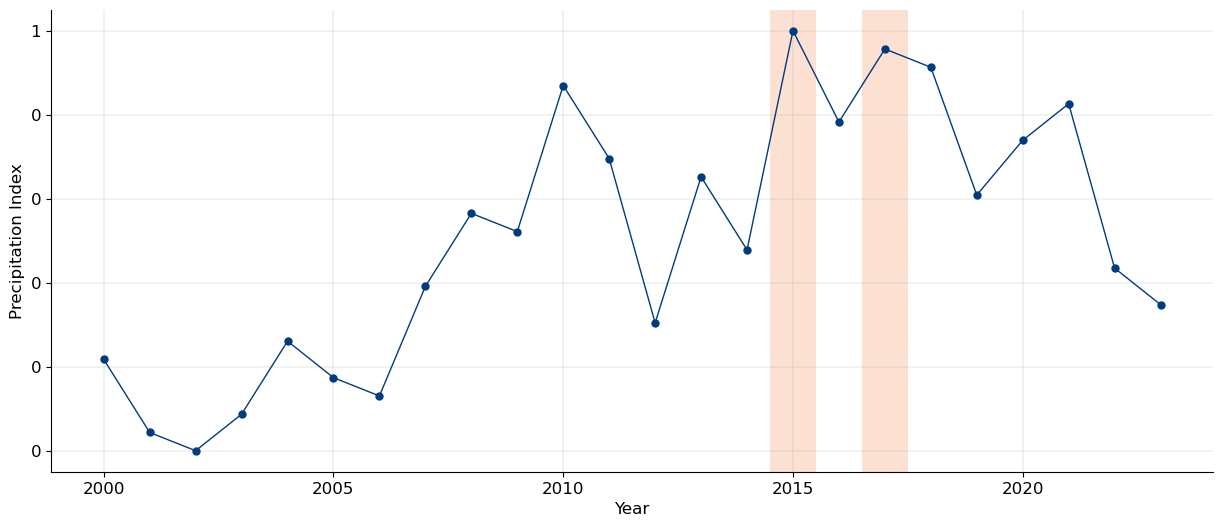

In [27]:
# figure size
fig, ax = plt.subplots(figsize=(15, 6))

# plot line
ax.plot(yearly_indices['YEAR'].tolist(),
        yearly_indices['prcp_index'].tolist(),
        marker='o',
        markersize=5,
        color='#003b7f',
        linestyle='-',
        linewidth=1,
        label='Precipitation Index')

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)
ax.axvspan(2014.5, 2015.5, facecolor='#f26419', alpha=0.2)
ax.axvspan(2016.5, 2017.5, facecolor='#f26419', alpha=0.2)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Precipitation Index', fontsize=12)
# ax.set_title("Yearly Precipitation Index", fontsize=12)

# show plot
plt.grid(True, linewidth=0.25)
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 20. Yearly Precipitation Index</b><br>
        <i>Variations in the Average Precipitation over the Years.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Are there notable signs of climate change?</i></span>

The year 2010 exhibited the highest variation in climate, followed closely by 2021, with recorded climate indices of 0.91 and 0.87, respectively. This observation suggests that these particular years had significant deviations from the average climate patterns, indicating potential changes in the Earth's climatic conditions.

Since the climate index considers temperature and precipitation, the high climate variation observed may be attributed to factors such as rising global temperatures which can lead to increased frequency and intensity of extreme weather events like heatwaves, droughts, storms, and heavy rainfall. Changes in atmospheric circulation patterns, ocean currents, and melting ice caps also contribute to shifts in regional climates.

Furthermore, variations in climate can have implications for human health, with potential impacts on heat-related illnesses, vector-borne diseases, and respiratory conditions. Socioeconomic systems, including infrastructure, energy, and transportation, may also face challenges due to changing climate patterns.

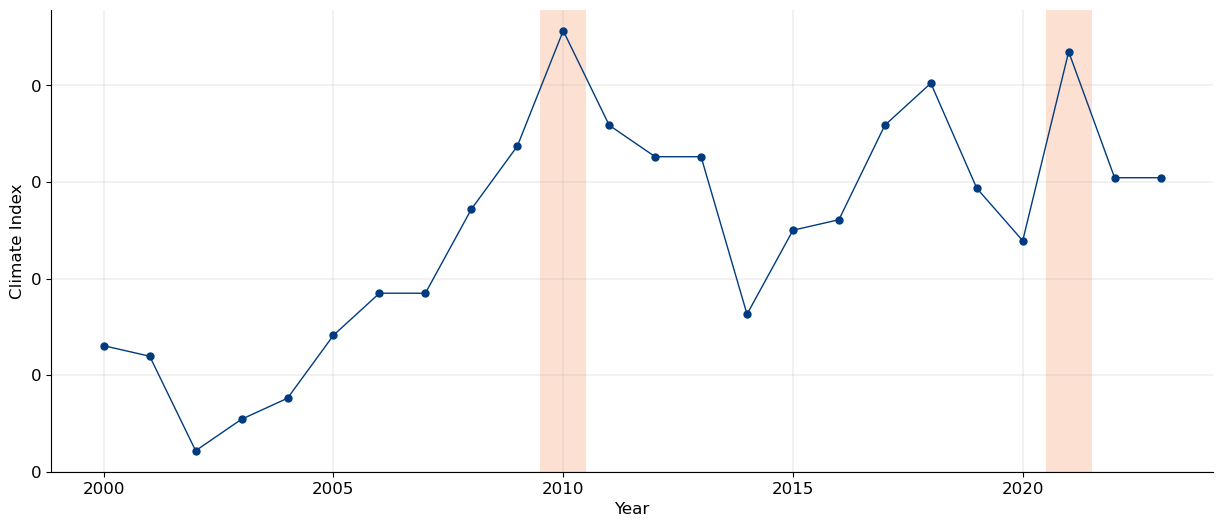

In [28]:
# figure size
fig, ax = plt.subplots(figsize=(15, 6))

# plot line
ax.plot(yearly_indices['YEAR'].tolist(),
        yearly_indices['climate_index'].tolist(),
        marker='o',
        markersize=5,
        color='#003b7f',
        linestyle='-',
        linewidth=1,
        label='Climate Index')

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)
ax.axvspan(2009.5, 2010.5, facecolor='#f26419', alpha=0.2)
ax.axvspan(2020.5, 2021.5, facecolor='#f26419', alpha=0.2)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Climate Index', fontsize=12)
# ax.set_title("Yearly Climate Index", fontsize=12)

# show plot
plt.grid(True, linewidth=0.25)
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 21. Yearly Climate Index</b><br>
        <i>Variations in the Climate over the Years.</i>
    </p>
</div>

<h2 style="color:#003b7f">Regional Analysis</h2>

In this section, we look at the temperature, precipitation, and climate by country within the 22-year period (from 2000-2022) observed. As detailed in Section VI. Methodology under Feature Engineering, these measures of variation are reflected by the `temp_index`, `prcp_index`, and `climate_index` fields, respectively.

In [29]:
# Load the dictionary from the file
with open('country_dict.pkl', 'rb') as file:
    country_dict = pickle.load(file)

with open('country_dict_df.pkl', 'rb') as file:
    country_dict_df = pickle.load(file)
    
# load the world shapefile data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# load data on indices by country
country_indices = pd.read_csv('data/country_indices.csv')

/tmp/ipykernel_351/2120075155.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<span style="color:#f26419; font-size:18px"><i>How did temperature vary across countries?</i></span>

Regions in the United States, Afghanistan, France, Iraq, and Sudan, experienced the greatest variations in temperature over the last two decades.

The causes of these temperature variations can be attributed to a combination of natural climate variability and human-induced climate change. Natural factors, such as El Niño and La Niña events, changes in atmospheric circulation patterns, and solar radiation, can influence regional temperature variations. However, human activities, particularly the emission of greenhouse gases, have played a substantial role in altering the Earth's climate system.

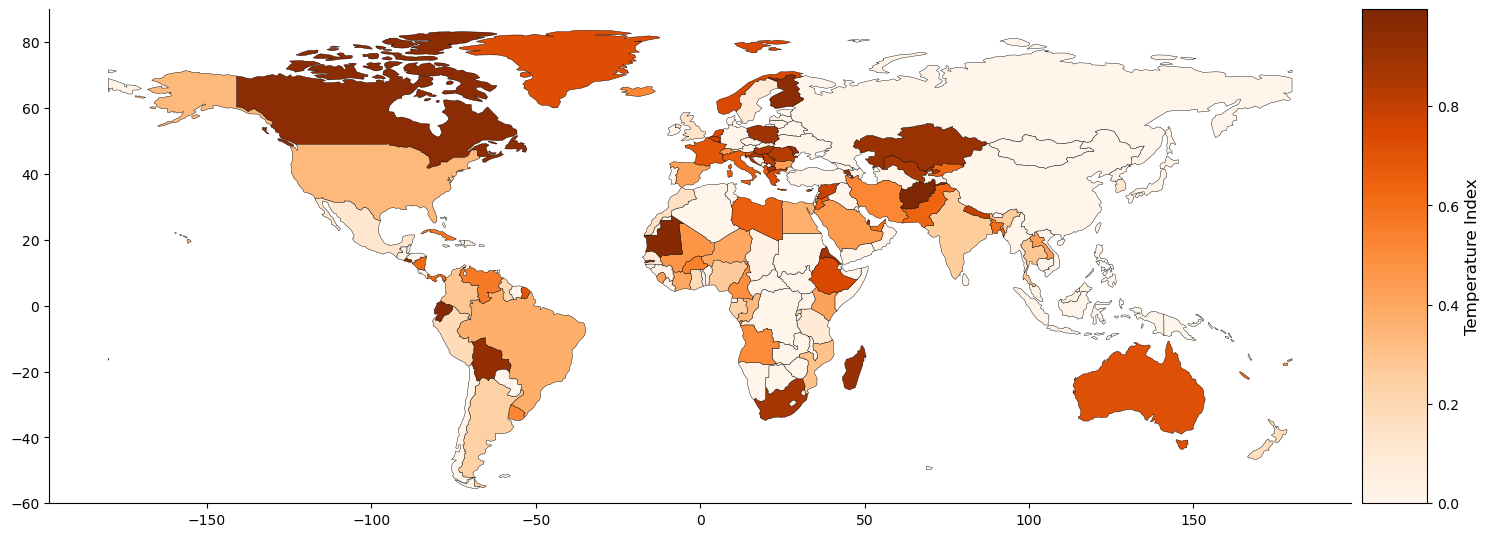

In [30]:
# define the countries to highlight and their respective weights
country_count = (country_indices[['COUNTRY_CODE', 'temp_index']]
                 .sort_values('temp_index',
                              ascending=False).values.tolist())

# create a new column 'highlight' with default value 0
world['highlight'] = 0

# set the 'highlight' value to the specified weight for the selected countries
for country, count in country_count:
    world.loc[world['name'] == country_dict.get(country), 'highlight'] = count

# plot the world map with highlighted countries
fig, ax = plt.subplots(figsize=(15, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(ax=ax,
           column='highlight',
           cmap='Oranges',
           linewidth=0.3, 
           edgecolor='black', 
           legend=True,
           cax=cax)

# set ocean color and style
ax.set_facecolor('white')

# add colorbar legend
cbar = plt.colorbar(ax.collections[0], cax=cax)
cbar.set_label('Temperature Index', fontsize=12)  # Set the legend title

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_title("Global Temperature Index", fontsize=12)

# set the limits for the latitude axis to exclude the poles
ax.set_ylim(-60, 90)

# show plot
plt.tight_layout()
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 22. Global Temperature Index</b><br>
        <i>Variations in the Average Temperature within the last 2 decades by country.</i>
    </p>
</div>

The United States [1] has witnessed notable temperature variations due to its large geographic extent and diverse climate regions. Some regions, such as the southwestern states, have experienced increased heatwaves and prolonged periods of high temperatures, impacting agriculture, water resources, and energy demands.

In Afghanistan [2], temperature variations have been linked to its continental climate and vulnerability to climate change impacts.

France [3], known for its diverse climate zones, has experienced temperature variations affecting different regions. In recent years, heat waves have become more frequent and intense, posing risks to public health, agriculture, and ecosystems. France's agricultural sector, particularly wine production, is susceptible to temperature fluctuations that can impact crop yields and quality.

Sudan [4] has witnessed temperature variations affecting its agriculture, water resources, and food security. Shifts in rainfall patterns and increased temperatures have contributed to prolonged droughts and decreased agricultural productivity.

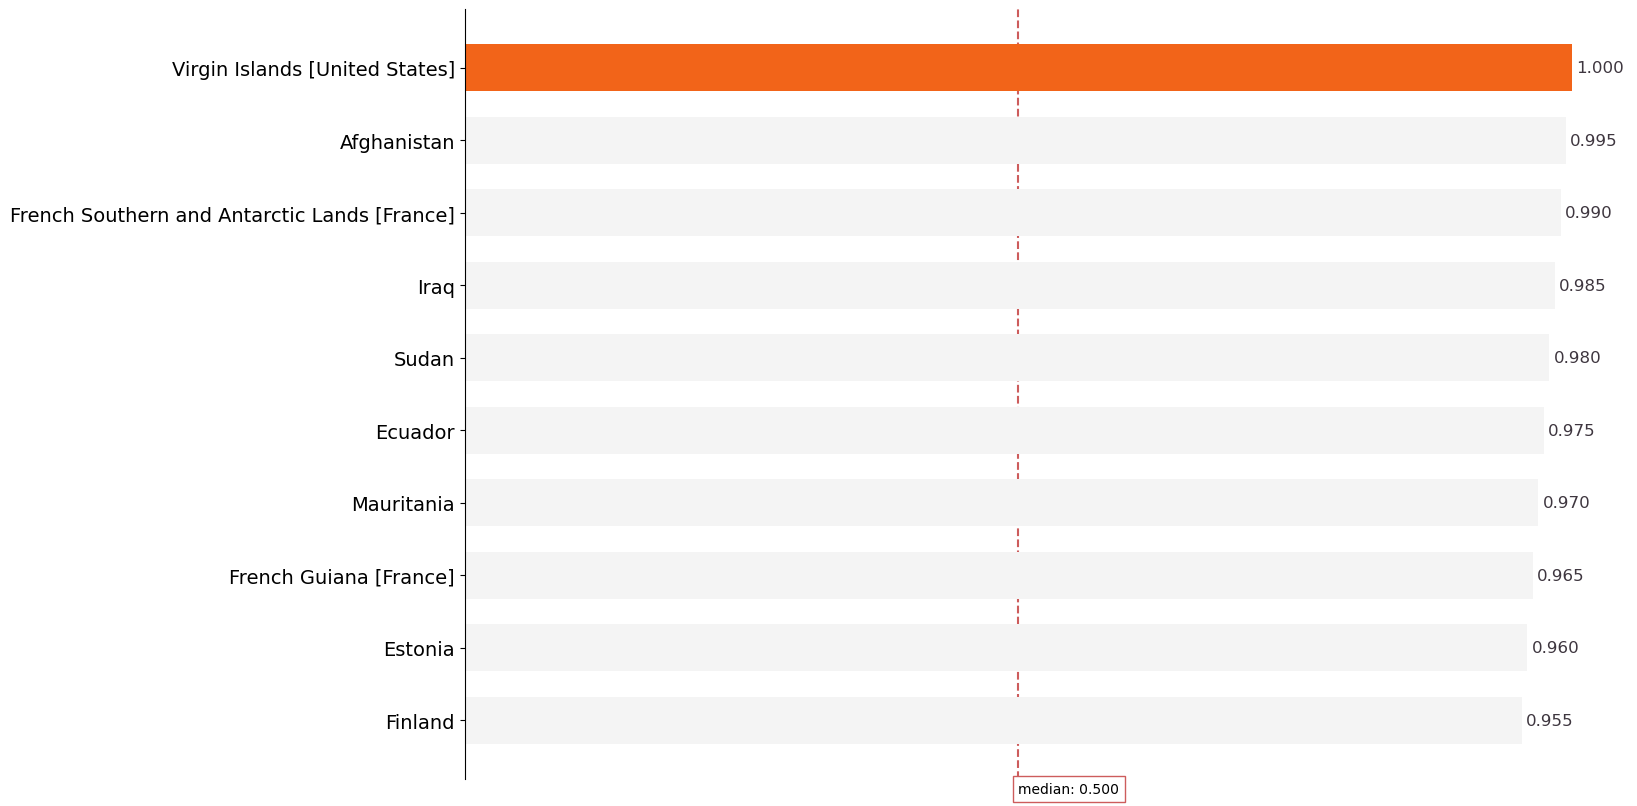

In [31]:
df_plt = (country_indices[['COUNTRY_CODE', 'COUNTRY', 'temp_index']]
                 .sort_values('temp_index', ascending=True))
y_col = 'temp_index'
x_col = 'COUNTRY'

# calculating mean
median_val = df_plt[y_col].mean()

# figure size
fig, ax = plt.subplots(figsize=(15, 10))

# determine the color for the bars
bar_colors = ['#f4f4f4'] * len(df_plt)
max_idx = df_plt[y_col].argmax()
bar_colors[max_idx] = '#f26419'

# horizontal bar plot
hbar_plt = plt.barh(df_plt[x_col][-10:],
                 df_plt[y_col][-10:],
                 height=0.65,
                 color=bar_colors[-10:])

# chart formatting and axis labels
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
formatter = tick.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.bar_label(hbar_plt,
             labels=[f'{x:,.3f}' for x in df_plt[y_col][-10:]],
             padding=3,
             color='#3e363f', 
             fontsize=12,
             label_type='edge',
             fontweight='regular')
ax.yaxis.set_tick_params(labelsize=14)
ax.axvline(x=median_val,
           zorder=0,
           color='indianred',
           ls='--',
           lw=1.5)
ax.text(x=median_val,
        y=-1.0,
        s=f'median: {median_val:,.3f}',
        ha='left', 
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='indianred', ls='-'))
 
# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 23. 10 Regions with the highest temperature index</b><br>
        <i>Regions who experienced the greatest variations in the Average Temperature within the last 2 decades.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>How did precipitation vary across countries?</i></span>

Regions in Sierra Leone, Guinea-Bissau, Burma (Myanmar), France, and Liberia have experienced the greatest variations in precipitation over the past two decades. Human activities, including deforestation, land-use changes, and greenhouse gas emissions, may have contributed to altering precipitation patterns.

Regions experiencing extreme precipitation events may face increased risks of flooding, landslides, and soil erosion, which can threaten infrastructure and human lives. Conversely, areas affected by reduced precipitation or prolonged droughts may experience water scarcity, reduced crop yields, and ecological stress.

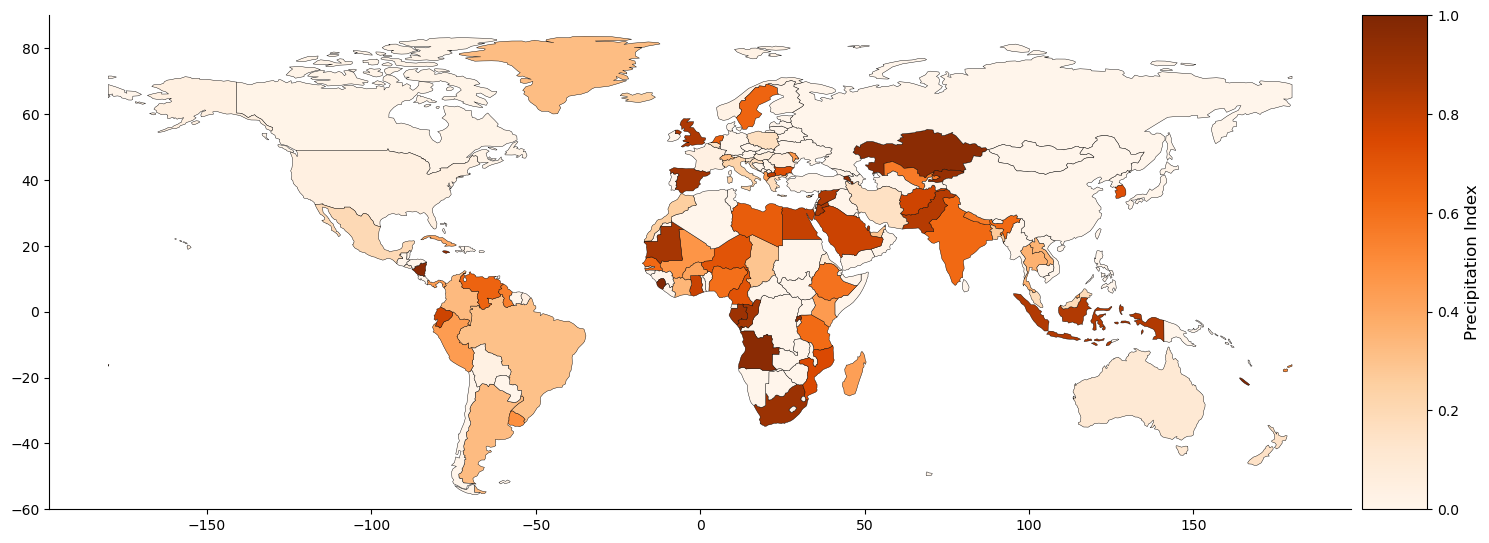

In [32]:
# define the countries to highlight and their respective weights
country_count = (country_indices[['COUNTRY_CODE', 'prcp_index']]
                 .sort_values('prcp_index', ascending=False).values.tolist())

# create a new column 'highlight' with default value 0
world['highlight'] = 0

# set the 'highlight' value to the specified weight for the selected countries
for country, count in country_count:
    world.loc[world['name'] == country_dict.get(country), 'highlight'] = count

# plot the world map with highlighted countries
fig, ax = plt.subplots(figsize=(15, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(ax=ax,
           column='highlight',
           cmap='Oranges',
           linewidth=0.3, 
           edgecolor='black', 
           legend=True,
           cax=cax)

# set ocean color and style
ax.set_facecolor('white')

# add colorbar legend
cbar = plt.colorbar(ax.collections[0], cax=cax)
cbar.set_label('Precipitation Index', fontsize=12)  # Set the legend title

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_title("Global Precipitation Index", fontsize=12)

# set the limits for the latitude axis to exclude the poles
ax.set_ylim(-60, 90)

# show plot
plt.tight_layout()
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 24. Global Precipitation Index</b><br>
        <i>Variations in the Average Precipitation within the last 2 decades by country.</i>
    </p>
</div>

Sierra Leone [5] has faced notable variations in precipitation due to its tropical climate and susceptibility to climate change impacts. Increased rainfall intensity and changes in the timing of the rainy season have led to flooding and landslides, affecting infrastructure, agriculture, and livelihoods.

In Guinea-Bissau [6], fluctuations in rainfall patterns and prolonged dry spells have impacted crop production and livestock farming, worsening existing challenges in a country highly dependent on rain-fed agriculture.

Burma (Myanmar) [7] has experienced significant precipitation variations due to its diverse geographical features and monsoon climate. Flooding and droughts have occurred, affecting livelihoods and increasing vulnerability in rural communities.

France [3], known for its varied climate zones, has also witnessed precipitation variations impacting different regions. Some areas have experienced increased rainfall intensity, leading to flooding events and soil erosion. 

Liberia [8], situated in West Africa, has experienced variations in precipitation affecting its agricultural sector, water resources, and overall development. Changes in rainfall patterns and extended dry periods have posed challenges to food security and water availability. 

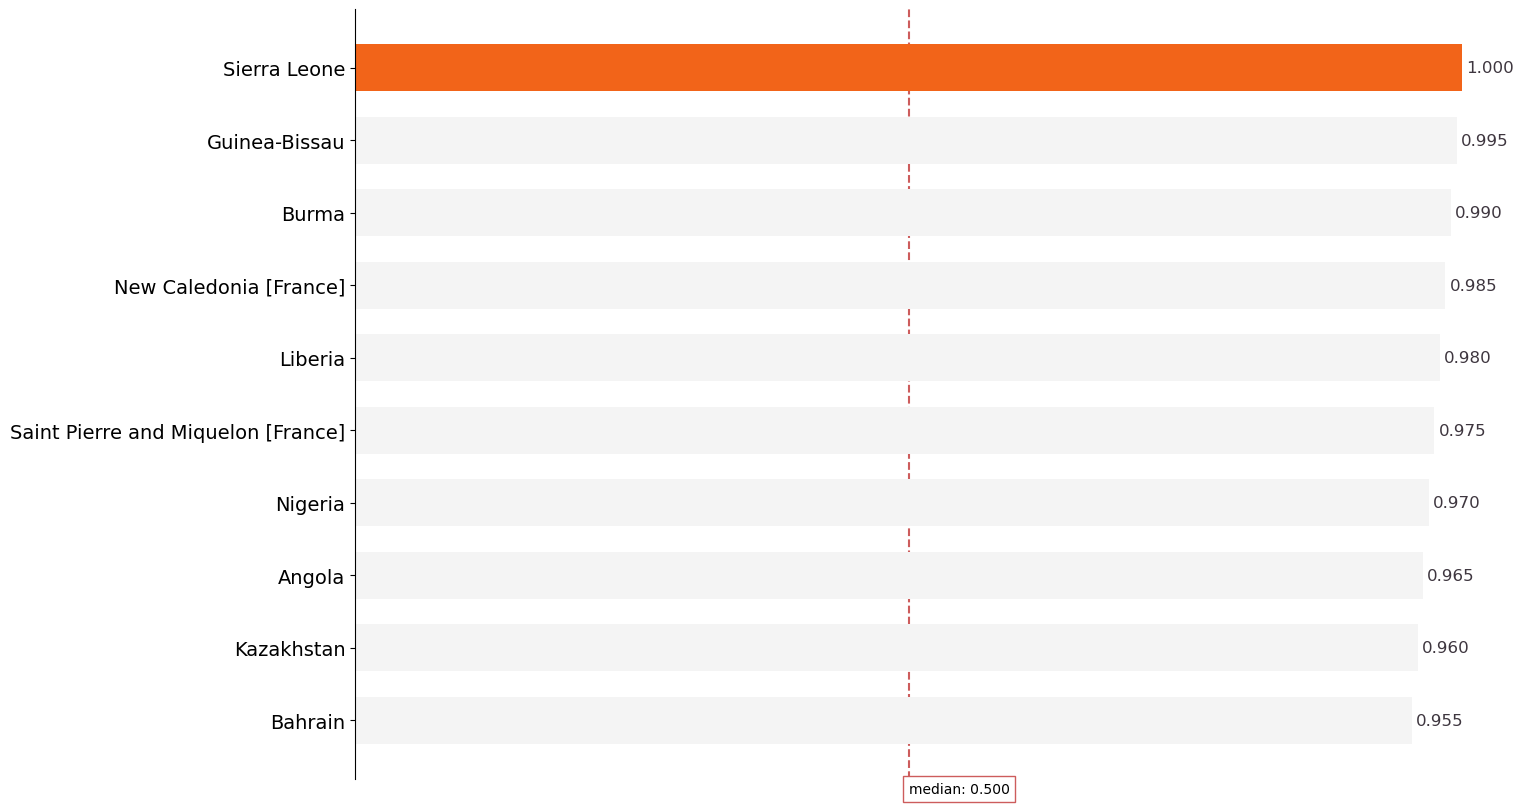

In [33]:
df_plt = (country_indices[['COUNTRY_CODE', 'COUNTRY', 'prcp_index']]
                 .sort_values('prcp_index', ascending=True))
y_col = 'prcp_index'
x_col = 'COUNTRY'

# calculating mean
median_val = df_plt[y_col].median()

# figure size
fig, ax = plt.subplots(figsize=(15, 10))

# determine the color for the bars
bar_colors = ['#f4f4f4'] * len(df_plt)
max_idx = df_plt[y_col].argmax()
bar_colors[max_idx] = '#f26419'

# horizontal bar plot
hbar_plt = plt.barh(df_plt[x_col][-10:],
                 df_plt[y_col][-10:],
                 height=0.65,
                 color=bar_colors[-10:])

# chart formatting and axis labels
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
formatter = tick.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.bar_label(hbar_plt,
             labels=[f'{x:,.3f}' for x in df_plt[y_col][-10:]],
             padding=3,
             color='#3e363f', 
             fontsize=12,
             label_type='edge',
             fontweight='regular')
ax.yaxis.set_tick_params(labelsize=14)
ax.axvline(x=median_val,
           zorder=0,
           color='indianred',
           ls='--',
           lw=1.5)
ax.text(x=median_val,
        y=-1.0,
        s=f'median: {median_val:,.3f}',
        ha='left', 
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='indianred', ls='-'))
 
# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 25. 10 Regions with the highest precipitation index</b><br>
        <i>Regions who experienced the greatest variations in the Average Precipitation within the last 2 decades.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Which countries are most vulnerable to climate change?</i></span>

Iran, Sudan, Kazakhstan, Armenia, and Mauritania have been identified as the most vulnerable countries to climate change over the past two decades. This designation indicates that these regions are particularly susceptible to the adverse impacts of climate change, which can manifest in various ways and pose significant challenges for their populations and ecosystems.

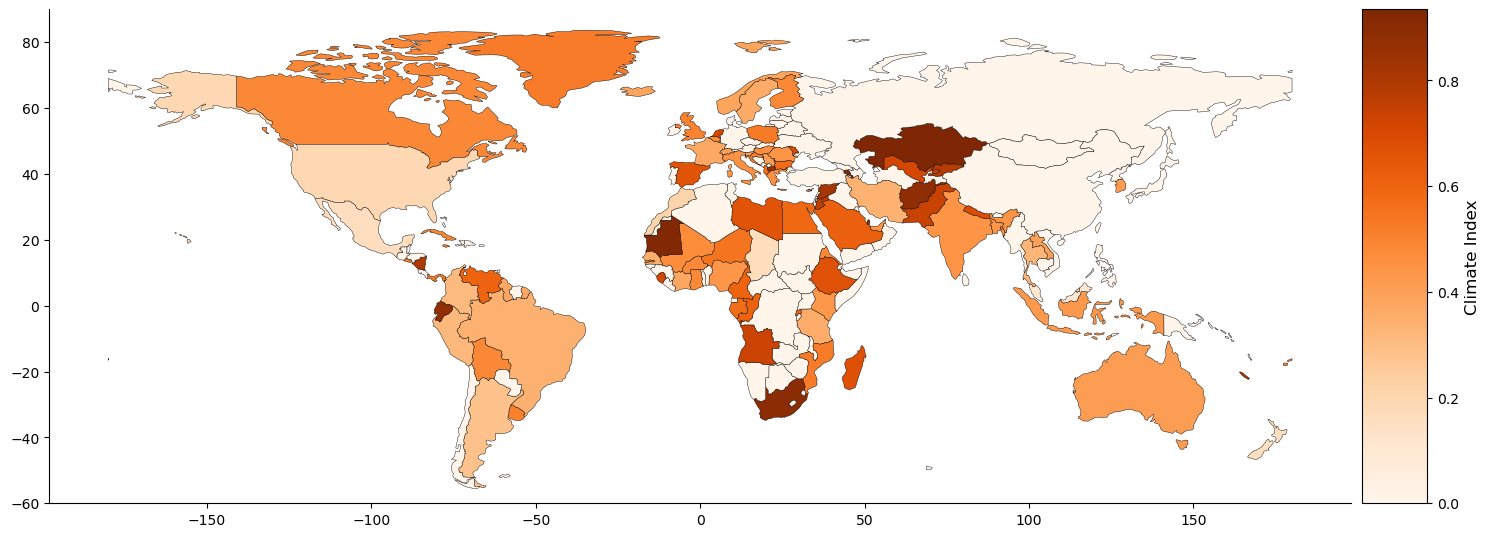

In [34]:
# define the countries to highlight and their respective weights
country_count = (country_indices[['COUNTRY_CODE', 'climate_index']]
                 .sort_values('climate_index',
                              ascending=False).values.tolist())

# create a new column 'highlight' with default value 0
world['highlight'] = 0

# set the 'highlight' value to the specified weight for the selected countries
for country, count in country_count:
    world.loc[world['name'] == country_dict.get(country), 'highlight'] = count

# plot the world map with highlighted countries
fig, ax = plt.subplots(figsize=(15, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(ax=ax,
           column='highlight',
           cmap='Oranges',
           linewidth=0.3, 
           edgecolor='black', 
           legend=True,
           cax=cax)

# set ocean color and style
ax.set_facecolor('white')

# add colorbar legend
cbar = plt.colorbar(ax.collections[0], cax=cax)
cbar.set_label('Climate Index', fontsize=12)  # Set the legend title

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_title("Global Climate Index", fontsize=12)

# set the limits for the latitude axis to exclude the poles
ax.set_ylim(-60, 90)

# show plot
plt.tight_layout()
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 26. Global Climate Index</b><br>
        <i>Variations in Climate within the last 2 decades by country.</i>
    </p>
</div>

The vulnerability of these countries to climate change can be attributed to several factors. First and foremost, their geographical locations expose them to specific climate risks and hazards.

For example, Iran [9], with its arid and semi-arid regions, is prone to droughts, heat waves, and water scarcity. Sudan [4], located in the Sahel region, faces challenges such as desertification, increased temperatures, and variability in rainfall patterns. Kazakhstan [10], being a landlocked country with diverse ecosystems, is susceptible to changes in water availability, extreme temperatures, and the melting of permafrost. Armenian [11], with its mountainous terrain, is vulnerable to changes in snowfall patterns, glacial retreats, and related water resource challenges. Mauritania [12], situated in the arid Saharan region, faces the risks of desertification, land degradation, and sea-level rise.

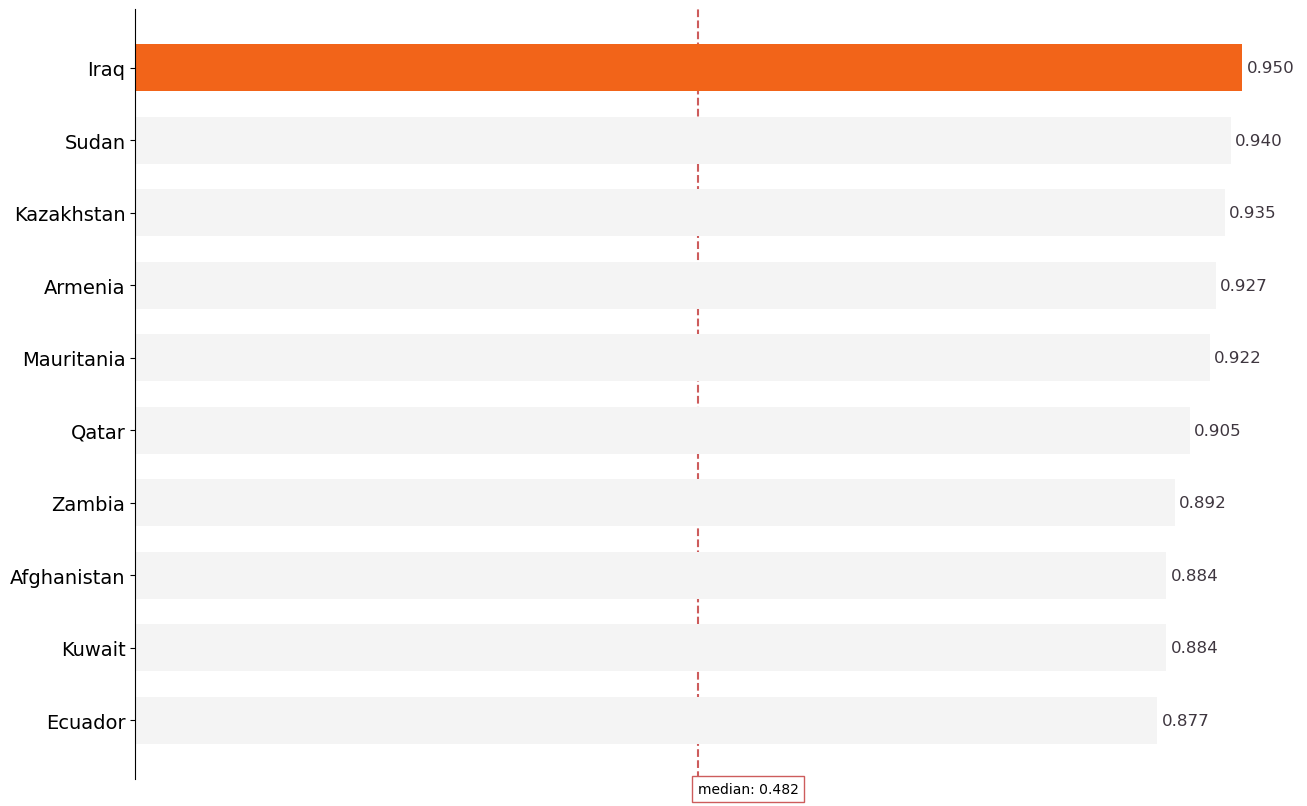

In [35]:
df_plt = (country_indices[['COUNTRY_CODE', 'COUNTRY', 'climate_index']]
                 .sort_values('climate_index', ascending=True))
y_col = 'climate_index'
x_col = 'COUNTRY'

# calculating mean
median_val = df_plt[y_col].median()

# figure size
fig, ax = plt.subplots(figsize=(15, 10))

# determine the color for the bars
bar_colors = ['#f4f4f4'] * len(df_plt)
max_idx = df_plt[y_col].argmax()
bar_colors[max_idx] = '#f26419'

# horizontal bar plot
hbar_plt = plt.barh(df_plt[x_col][-10:],
                 df_plt[y_col][-10:],
                 height=0.65,
                 color=bar_colors[-10:])

# chart formatting and axis labels
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
formatter = tick.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.bar_label(hbar_plt,
             labels=[f'{x:,.3f}' for x in df_plt[y_col][-10:]],
             padding=3,
             color='#3e363f', 
             fontsize=12,
             label_type='edge',
             fontweight='regular')
ax.yaxis.set_tick_params(labelsize=14)
ax.axvline(x=median_val,
           zorder=0,
           color='indianred',
           ls='--',
           lw=1.5)
ax.text(x=median_val,
        y=-1.0,
        s=f'median: {median_val:,.3f}',
        ha='left', 
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='indianred', ls='-'))
 
# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 27. 10 Regions with the highest climate index</b><br>
        <i>Regions who experienced the greatest variations in Climate within the last 2 decades.</i>
    </p>
</div>

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">VIII. Results & Discussions</h1>

<span style="color:#f26419; font-size:18px"><i>Impact of Temperature and Precipitation</i></span>

The analysis of temperature and precipitation patterns provides valuable insights into the potential impacts of climate change on the studied region. These findings have significant implications for ecosystems, agriculture, water resources, and human societies.

**Temperature Variation**

- The observed data revealed a notable decrease in average maximum temperature (TMAX) and average minimum temperature (TMIN) over the years. This trend contradicts the expectation of global warming, highlighting the complexity of climate change impacts. While global warming is a long-term trend, regional and local variations can lead to diverse temperature patterns. Factors such as natural climate variability, changes in atmospheric circulation patterns, and localized climate drivers can influence temperature variations. These findings emphasize the need for careful analysis of temperature trends at regional scales to understand the complex dynamics of climate change.

*Therefore, it is more appropriate to describe climate change and consider additional factors such as variability when creating a temperature index. This approach will yield a more accurate representation of climate change. We will explore this concept further in the global temporal trend analysis.*

**Precipitation Variation**

- The analysis also indicated a significant increase in average precipitation over the years. This finding aligns with the expectations of climate change, as rising temperatures can lead to increased evaporation rates and atmospheric moisture content, resulting in higher precipitation levels. The observed variations in precipitation patterns have implications for ecosystems, agriculture, and water resources. Increased rainfall can lead to flooding events, soil erosion, and changes in hydrological systems. Conversely, regions experiencing decreased precipitation or prolonged droughts may face water scarcity, reduced crop yields, and ecological stress.

These findings underscore the importance of considering both temperature and precipitation variations in climate change assessments. The complex interplay between these two variables influences the overall climate conditions and can have cascading effects on natural and human systems. It is crucial to continue monitoring and analyzing climate data to better understand the trends, drivers, and impacts of temperature and precipitation changes, enabling informed decision-making for climate adaptation and mitigation strategies.

</br>

<span style="color:#f26419; font-size:18px"><i>Global Temporal Trends</i></span>

The analysis of global temporal trends provided insights into the variations in temperature, precipitation, and climate indices over the 22-year period (2000-2022). These findings shed light on the potential impacts of climate change on a global scale.

**Temperature Variation**

- The analysis revealed notable variations in temperature over time. The years 2012 and 2010 stood out with the highest temperature indices, indicating significant deviations from the average temperature patterns. These observations raise concerns about the implications of climate change, including the increased frequency and intensity of extreme weather events such as heat waves and cold snaps. Such extreme weather events can disrupt ecosystems, threaten human health, and impact critical infrastructure.

**Precipitation Variation**

- The analysis also highlighted variations in precipitation over the years. The years 2015 and 2017 exhibited the highest precipitation indices, indicating significant deviations from the usual precipitation patterns. These findings suggest unstable weather events related to rainfall, which can have profound impacts on ecosystems, agriculture, water resources, and human societies. The observed variations in precipitation patterns could be influenced by climate change-related factors, including altered atmospheric moisture content, shifts in weather systems, and natural climate variability.

**Climate Variation**

- The analysis of the climate index, which considers both temperature and precipitation, revealed notable variations in climate over time. The years 2010 and 2021 showed the highest climate indices, indicating substantial deviations from the average climate patterns. These observations suggest potential changes in the Earth's climatic conditions, which can have far-reaching consequences. Rising global temperatures, in particular, can lead to increased frequency and intensity of extreme weather events such as heatwaves, droughts, storms, and heavy rainfall. Changes in atmospheric circulation patterns, ocean currents, and melting ice caps further contribute to shifts in regional climates.

These global temporal trends underscore the urgency of addressing climate change on a global scale. The observed variations in temperature, precipitation, and climate indices highlight the need for proactive measures to mitigate greenhouse gas emissions, adapt to changing climate conditions, and build resilience in vulnerable regions.

</br>

<span style="color:#f26419; font-size:18px"><i>Regional Trends</i></span>

The analysis of regional trends provided insights into the variations in temperature and precipitation across different countries within the studied period (2000-2022). These findings shed light on the specific climate challenges faced by various regions and the potential vulnerabilities to climate change.

**Temperature Variation Across Countries**

- Several countries experienced notable temperature variations over the past two decades. The United States, Afghanistan, France, Iraq, and Sudan stood out with significant temperature variations. These variations can be attributed to a combination of natural climate variability and human-induced climate change. Geographic factors, such as the diverse climate regions in the United States and the vulnerability to climate change impacts in Afghanistan, contribute to temperature variations. France, known for its varied climate zones, has witnessed temperature variations affecting different regions, particularly with increased heatwaves. Sudan has faced temperature variations impacting agriculture, water resources, and food security, driven by shifts in rainfall patterns and increased temperatures.

**Precipitation Variation Across Countries**

- Several countries experienced significant variations in precipitation over the past two decades. Sierra Leone, Guinea-Bissau, Burma (Myanmar), France, and Liberia were among the countries with notable precipitation variations. These variations can be influenced by factors such as deforestation, land-use changes, and greenhouse gas emissions. Extreme precipitation events in these regions can lead to flooding, landslides, and soil erosion, while reduced precipitation or prolonged droughts can result in water scarcity, reduced crop yields, and ecological stress. The observed precipitation variations highlight the vulnerability of these regions to changing rainfall patterns and the need for adaptive strategies to mitigate the impacts.

**Climate Change Vulnerability**

- Iran, Sudan, Kazakhstan, Armenia, and Mauritania were identified as the most vulnerable countries to climate change. These designations indicate that these regions are particularly susceptible to the adverse impacts of climate change. The vulnerability of these countries stems from a combination of factors, including their geographical location, climate characteristics, and socio-economic conditions.

    1. Iran, characterized by its arid and semi-arid regions, faces challenges such as droughts, heat waves, and water scarcity. These conditions can impact agriculture, water resources, and human livelihoods, exacerbating existing socio-economic disparities.

    2. Sudan, located in the Sahel region, is vulnerable to desertification, increased temperatures, and variability in rainfall patterns. These factors pose risks to agriculture, water availability, and food security, affecting vulnerable populations and exacerbating social and economic inequalities.

    3. Kazakhstan, being a landlocked country with diverse ecosystems, is susceptible to changes in water availability, extreme temperatures, and the melting of permafrost. These changes can have far-reaching consequences for agriculture, infrastructure, and the livelihoods of local communities.

    4. Armenia, with its mountainous terrain, faces challenges related to changes in snowfall patterns, glacial retreats, and water resource management. These impacts can affect agriculture, hydropower generation, and the stability of mountain ecosystems, with implications for local communities and biodiversity.

    5. Mauritania, situated in the arid Saharan region, faces risks associated with desertification, land degradation, and sea-level rise. These impacts can disrupt ecosystems, degrade agricultural lands, and threaten coastal communities, exacerbating socio-economic vulnerabilities.

The vulnerability of these countries underscores the importance of adaptation strategies and international cooperation in addressing the impacts of climate change. Efforts should focus on building resilience, enhancing adaptive capacity, and implementing sustainable development practices. Furthermore, addressing the root causes of climate change, such as reducing greenhouse gas emissions, is crucial for long-term mitigation and minimizing the vulnerability of these regions to future climate risks.

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">IX. Conclusion</h1>

<span style="color:#f26419; font-size:18px"><i>Global Temporal Trends</i></span>

**Temperature variations over time** 

- Our analysis revealed significant variations in temperature over the years, with the highest variation recorded in 2012 and 2010. These variations have implications for climate change, as increased frequency and intensity of extreme weather events can disrupt ecosystems and pose risks to human health and infrastructure.

**Precipitation variations over time**

- We observed notable variations in precipitation over the years, with the highest variation recorded in 2015 and 2017. These deviations from usual precipitation patterns suggest unstable weather events related to rainfall, which can have profound impacts on ecosystems, agriculture, water resources, and human societies.

</br>

<span style="color:#f26419; font-size:18px"><i>Regional Trends</i></span>

**Temperature variations across countries**

- We found that regions in the United States, Afghanistan, France, Iraq, and Sudan experienced the greatest variations in temperature. These variations can be attributed to a combination of natural climate variability and human-induced climate change. Understanding these temperature variations is crucial for addressing the impacts on agriculture, water resources, and energy demands in these regions.

**Precipitation variations across countries**

- Our analysis revealed that regions in Sierra Leone, Guinea-Bissau, Burma (Myanmar), France, and Liberia exhibited the greatest variations in precipitation. Human activities, such as deforestation and greenhouse gas emissions, may have contributed to these alterations in precipitation patterns. The observed variations can lead to increased risks of flooding, landslides, water scarcity, and reduced crop yields.

</br>

<span style="color:#f26419; font-size:18px"><i>Climate Change Vulnerability</i></span>

**Factors contributing to vulnerability**

The vulnerability of countries such as Iran, Sudan, Kazakhstan, Armenia, and Mauritania to climate change can be attributed to their geographical locations, which expose them to specific climate risks and hazards. These include droughts, heat waves, water scarcity, desertification, and sea-level rise.

**Implications for vulnerable countries**

The impacts of climate change in these vulnerable countries are diverse, ranging from agricultural challenges and water resource management to public health risks and ecological stress. Addressing their vulnerability requires targeted adaptation strategies and international support.

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">X. Recommendations</h1>

<span style="color:#f26419; font-size:18px"><i>To the Government Sector</i></span>

**Strengthen Climate Policies**

- Governments should enact and enforce robust climate policies that prioritize greenhouse gas reduction targets, promote renewable energy sources, and incentivize sustainable practices across all sectors. This includes implementing carbon pricing mechanisms, supporting clean technology innovation, and fostering international collaborations to address climate change collectively.

**Invest in Climate Resilience**

- Governments should allocate resources to develop and implement climate adaptation and resilience strategies. This includes investing in infrastructure that can withstand extreme weather events, implementing early warning systems for natural disasters, and enhancing coastal protection measures. Additionally, supporting research and development for climate-resilient agriculture and water resource management can help mitigate the impacts of changing precipitation patterns.

</br>

<span style="color:#f26419; font-size:18px"><i>To the People (Citizens)</i></span>

**Promote Sustainable Lifestyles**

- Individuals can contribute to climate action by adopting sustainable behaviors in their daily lives. This includes reducing energy consumption, minimizing waste generation, and opting for eco-friendly transportation methods. Citizens can also support local initiatives and advocate for policies that prioritize sustainability and climate change mitigation in their communities.

**Raise Awareness and Education**

- It is crucial to raise awareness about the impacts of climate change and the importance of individual and collective actions. Governments, educational institutions, and civil society organizations should collaborate to provide accurate and accessible information about climate change, its consequences, and potential solutions. Empowering citizens with knowledge can inspire behavioral change and foster a sense of responsibility towards the environment.

</br>

<span style="color:#f26419; font-size:18px"><i>To Scientists</i></span>

**Enhance Climate Monitoring and Research**

- Scientists should continue to advance climate monitoring systems and research methodologies to improve the accuracy and reliability of climate data. This includes expanding the coverage of climate monitoring networks, integrating satellite observations, and leveraging advanced modeling techniques. By enhancing our understanding of climate dynamics, scientists can provide valuable insights for policymakers and contribute to evidence-based decision-making.

**Foster Interdisciplinary Collaboration**

- Addressing the complex challenges of climate change requires collaboration among scientists from various disciplines. Researchers should foster interdisciplinary partnerships to explore the interconnectedness of climate, ecosystems, human societies, and policy interventions. This collaboration can generate comprehensive and holistic solutions to mitigate and adapt to climate change effectively.

</br>

<span style="color:#f26419; font-size:18px"><i>To Future Project Extensions</i></span>

**Long-term Data Continuity**

- Future projects should prioritize the continuity of climate data collection over extended periods. Long-term data is vital for accurately assessing climate trends, understanding interannual variability, and detecting long-term climate change signals. This includes ensuring sustained funding and support for climate monitoring programs and integrating data preservation strategies to ensure data accessibility for future research.

**Integration of Socioeconomic Factors**

- Future project extensions should aim to integrate socioeconomic factors into climate analysis to capture the multidimensional impacts of climate change. This includes assessing the socioeconomic vulnerabilities associated with climate change, evaluating the equity implications of climate policies, and exploring innovative approaches that promote sustainable development while addressing social justice concerns.

<span style="color:#f26419; font-size:18px"><i>Call to Action</i></span>

We are at a critical juncture in our fight against climate change, and the time for action is now. Each and every one of us has a role to play in addressing this global challenge. Let us come together and take meaningful action to create a sustainable and resilient future for our planet.

**Join the movement**

*Advocate for Change*

- Raise your voice and urge policymakers to prioritize climate action. Write letters to your elected representatives, participate in local climate initiatives, and support organizations working towards climate solutions. Together, we can create a powerful force for change.

*Embrace Sustainable Choices*

- Make conscious decisions in your daily life that reduce your carbon footprint. Opt for renewable energy sources, minimize waste, practice water conservation, and adopt sustainable transportation options. Small actions can make a big difference when multiplied across communities.

*Engage in Climate Education*

- Educate yourself and others about climate change. Stay informed about the latest scientific research, attend climate-related events, and engage in discussions about climate issues. By expanding our knowledge, we can become better advocates for climate action.

*Support Climate Solutions*

- Contribute to initiatives and projects that are driving positive change. Donate to organizations working on renewable energy, climate research, and conservation efforts. Volunteer your time to participate in local sustainability initiatives. Together, we can make a significant impact.

Remember, our actions today will shape the world of tomorrow. Let us unite in our commitment to combating climate change and creating a sustainable future for generations to come. Take action now, and be part of the solution.

<h1 style="background-color:#003b7f;color:#ffffff;padding:20px">XI. References</h1>

**Countries**

[1] Country - United States. (n.d.). World Bank Climate Change Knowledge Portal. Retrieved from https://climateknowledgeportal.worldbank.org/country/united-states

[2] Country - Afghanistan. (n.d.-b). World Bank Climate Change Knowledge Portal. Retrieved from https://climateknowledgeportal.worldbank.org/country/afghanistan/trends-variability-historical

[3] Country - France. (n.d.). World Bank Climate Change Knowledge Portal. Retrieved from https://climateknowledgeportal.worldbank.org/country/france

[4] Country - Sudan. (n.d.). World Bank Climate Change Knowledge Portal. Retrieved from https://climateknowledgeportal.worldbank.org/country/sudan/climate-data-historical

[5] Country - Sierra Leone. (n.d.). World Bank Climate Change Knowledge Portal. Retrieved from https://climateknowledgeportal.worldbank.org/country/sierra-leone

[6] Country - Guinea-Bissau. (n.d.). World Bank Climate Change Knowledge Portal. Retrieved from https://climateknowledgeportal.worldbank.org/country/guinea-bissau

[7] Country - Guinea-Bissau. (n.d.). World Bank Climate Change Knowledge Portal. Retrieved from https://climateknowledgeportal.worldbank.org/country/guinea-bissau

[8] Country - Myanmar. (n.d.). World Bank Climate Change Knowledge Portal. Retrieved from https://climateknowledgeportal.worldbank.org/country/myanmar

[9] Country - Liberia. (n.d.). World Bank Climate Change Knowledge Portal. Retrieved from https://climateknowledgeportal.worldbank.org/country/liberia

[10] Country - Iran. (n.d.). World Bank Climate Change Knowledge Portal. Retrieved from https://climateknowledgeportal.worldbank.org/country/iran-islamic-rep

[11] Country - Kazakhstan. (n.d.). World Bank Climate Change Knowledge Portal. Retrieved from https://climateknowledgeportal.worldbank.org/country/kazakhstan

[12] Country - Armenia. (n.d.). World Bank Climate Change Knowledge Portal. Retrieved from https://climateknowledgeportal.worldbank.org/country/armenia

[13] Country - Mauritania. (n.d.). World Bank Climate Change Knowledge Portal. Retrieved from https://climateknowledgeportal.worldbank.org/country/mauritania

</br>

**Climate Change**

[14] World Bank Group. (n.d.). What is Climate Change? World Bank Climate Change Knowledge Portal. Retrieved from https://climateknowledgeportal.worldbank.org/overview

[15] United Nations. (n.d.). What is Climate Change? United Nations Portal. Retrieved from https://www.un.org/en/climatechange/what-is-climate-change

[16] Le Treut, H., R. Somerville, U. Cubasch, Y. Ding, C. Mauritzen, A. Mokssit, T. Peterson and M. Prather, 2007: Historical Overview of Climate Change. In: Climate Change 2007: The Physical Science Basis. Contribution of Working Group I to the Fourth Assessment Report of the Intergovernmental Panel on Climate Change [Solomon, S., D. Qin, M. Manning, Z. Chen, M. Marquis, K.B. Averyt, M. Tignor and H.L. Miller (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA. Retrieved from https://www.ipcc.ch/site/assets/uploads/2018/03/ar4-wg1-chapter1.pdf

[17] United States Environmental Protection Agency. (n.d.). Basics of Climate Change. Climate Change Science. Retrieved from https://www.epa.gov/climatechange-science/basics-climate-change